# 🏪 Retail Store Product Sales Simulation — Exploratory Data Analysis

---

## 👤 About the Author

**Author:** [Hammad_zahid]\
**Kaggle:** [kaggle.com/hammadansari7](https://www.kaggle.com/hammadansari7)\
**LinkedIn:** [linkedin.com/in/Hammad Zahid](https://www.linkedin.com/in/hammad-zahid-xyz/)\
**GitHub:** [github.com/Hamad-Ansari](https://github.com/Hamad-Ansari)\
**Twitter/X:** [@zahid_hamm57652](https://x.com/zahid_hamm57652)

---

## 📖 About This Notebook

Welcome! In this notebook, we perform a **comprehensive Exploratory Data Analysis (EDA)** on the **Retail Store Product Sales Simulation Dataset**. This synthetic dataset simulates daily product-level data across a fictional retail chain with **15,000 rows** and **11 features** covering pricing, promotions, store traffic, competition, stock levels, and customer behavior.

### 🎯 Objectives:
1. **Understand** the structure, shape, and quality of the data
2. **Explore** distributions of every feature
3. **Detect** outliers and anomalies
4. **Uncover** correlations and nonlinear relationships
5. **Engineer** insights through feature interactions
6. **Answer** key business questions with data-driven evidence
7. **Summarize** findings and actionable takeaways

### 📦 Dataset Features:
| Feature | Description |
|---|---|
| `price` | Product base price 💵 |
| `discount` | Discount applied to the product 🎯 |
| `promotion_intensity` | Strength of promotional campaigns 📢 |
| `footfall` | Number of customers visiting the store 👥 |
| `ad_spend` | Advertising spend 📺 |
| `competitor_price` | Average competitor pricing 🏷️ |
| `stock_level` | Available stock in the store 📦 |
| `weather_index` | Weather conditions indicator ☀️🌧️ |
| `customer_sentiment` | Estimated customer satisfaction 😊 |
| `return_rate` | Proportion of products returned 🔄 |

> **Note:** The dataset is synthetic but realistic — features are **nonlinearly interdependent**, introducing correlations, seasonality, and complex interactions.

---

*If you find this notebook helpful, please consider giving it an **upvote** ⬆️! It motivates me to create more quality content.*

---

---
# 📚 Table of Contents

1. [Setup & Imports](#1)
2. [Loading the Dataset](#2)
3. [First Look at the Data](#3)
4. [Data Quality Assessment](#4)
5. [Univariate Analysis](#5)
6. [Bivariate Analysis](#6)
7. [Correlation Analysis](#7)
8. [Outlier Detection](#8)
9. [Feature Interaction & Engineering](#9)
10. [Advanced Visualizations](#10)
11. [Key Questions & Answers](#11)
12. [Summary & Conclusions](#12)

---

<a id="1"></a>
# 1️⃣ Setup & Imports

Let's import all the libraries we'll need throughout this analysis.

In [4]:
# ============================================================
# 1. SETUP & IMPORTS
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis, shapiro
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Color palette for consistency
COLORS = {
    'primary': '#2196F3',
    'secondary': '#FF9800',
    'success': '#4CAF50',
    'danger': '#F44336',
    'purple': '#9C27B0',
    'teal': '#009688'
}
PALETTE = list(COLORS.values())

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print(f"📦 Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.3.2
📦 NumPy version: 2.2.6
📦 Seaborn version: 0.13.2


<a id="2"></a>
# 2️⃣ Loading the Dataset

Let's load the dataset and take our first peek at the data.

In [5]:
# ============================================================
# 2. LOADING THE DATASET
# ============================================================

# Load the dataset
df = pd.read_csv('RetailStoreProductSalesDataset.csv')
# Drop the unnamed index column if present
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("🗑️ Dropped 'Unnamed: 0' column (auto-generated index).\n")

print(f"✅ Dataset loaded successfully!")
print(f"📐 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
🗑️ Dropped 'Unnamed: 0' column (auto-generated index).

✅ Dataset loaded successfully!
📐 Shape: 15,000 rows × 10 columns
💾 Memory Usage: 1.14 MB


<a id="3"></a>
# 3️⃣ First Look at the Data

We'll examine the first/last rows, data types, and basic statistics to understand what we're working with.

In [6]:
# ============================================================
# 3. FIRST LOOK AT THE DATA
# ============================================================

print("=" * 70)
print("📋 FIRST 5 ROWS")
print("=" * 70)
df.head()

📋 FIRST 5 ROWS


price  discount  promotion_intensity  footfall  ad_spend  \
0 45.1975    5.5143               4.0627  277.0175 2559.0739   
1 49.3275    6.5720               4.9647  250.7607 2536.4172   
2 47.3285    6.9727               4.3632  263.1305 2552.9524   
3 50.9645    4.8082               3.5780  297.6039 2605.3988   
4 44.5302    8.1802               4.9666  208.9317 2432.4857   

   competitor_price  stock_level  weather_index  customer_sentiment  \
0           44.2554    1176.9814         7.4422              1.0218   
1           50.3317    1219.3595         6.7595              0.9751   
2           49.2860    1263.8227         5.9417              0.8716   
3           46.8399    1182.4354         8.5170              1.0713   
4           45.3365    1178.5133         8.4225              1.0685   

   return_rate  
0       0.0674  
1       0.0827  
2       0.0616  
3       0.0522  
4       0.0580

In [7]:
print("=" * 70)
print("📋 LAST 5 ROWS")
print("=" * 70)
df.tail()

📋 LAST 5 ROWS


price  discount  promotion_intensity  footfall  ad_spend  \
14995 48.6788    5.7175               4.6778  222.1249 2442.8018   
14996 51.7727    8.6156               4.4472  290.5643 2560.3462   
14997 33.6666    8.7348               4.5145  273.0908 2492.5228   
14998 39.0359    9.6428               5.2550  198.1304 2443.7119   
14999 48.1445    5.6239               4.4144  256.9944 2544.5644   

       competitor_price  stock_level  weather_index  customer_sentiment  \
14995           51.8588    1209.0175         5.9092              1.0266   
14996           49.1738    1205.7329         5.6818              1.0551   
14997           35.6176    1184.5651         7.2774              0.9601   
14998           45.3180    1206.8866         7.8701              0.9766   
14999           44.9628    1224.8261         6.5015              0.9032   

       return_rate  
14995       0.0576  
14996       0.0689  
14997       0.0935  
14998       0.0635  
14999       0.0596

In [8]:
print("=" * 70)
print("📋 RANDOM SAMPLE OF 5 ROWS")
print("=" * 70)
df.sample(5, random_state=42)

📋 RANDOM SAMPLE OF 5 ROWS


price  discount  promotion_intensity  footfall  ad_spend  \
11499 62.5385    9.4087               5.5369  272.8718 2448.0804   
6475  56.9004    8.7382               5.3848  288.4947 2490.6961   
13167 42.8901    6.7936               3.2958  128.4974 2296.3492   
862   32.3698   14.4951               5.5290  287.4483 2604.3242   
5970  23.6067   16.0737               6.1672  258.3998 2522.5161   

       competitor_price  stock_level  weather_index  customer_sentiment  \
11499           62.3984    1162.0424         9.3540              0.9355   
6475            52.1891    1124.5807        10.3043              0.9263   
13167           44.5688    1207.8271         6.4495              1.1007   
862             29.3417    1248.6796         9.6908              0.9898   
5970            26.5229    1186.9210         9.4198              0.9789   

       return_rate  
11499       0.0615  
6475        0.0461  
13167       0.0759  
862         0.0859  
5970        0.0704

In [9]:
print("=" * 70)
print("📋 DATA TYPES & NON-NULL COUNTS")
print("=" * 70)
print(df.info())

📋 DATA TYPES & NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                15000 non-null  float64
 1   discount             15000 non-null  float64
 2   promotion_intensity  15000 non-null  float64
 3   footfall             15000 non-null  float64
 4   ad_spend             15000 non-null  float64
 5   competitor_price     15000 non-null  float64
 6   stock_level          15000 non-null  float64
 7   weather_index        15000 non-null  float64
 8   customer_sentiment   15000 non-null  float64
 9   return_rate          15000 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB
None


In [10]:
print("=" * 70)
print("📋 COMPREHENSIVE STATISTICAL SUMMARY")
print("=" * 70)
desc = df.describe().T
desc['range'] = desc['max'] - desc['min']
desc['IQR'] = desc['75%'] - desc['25%']
desc['cv'] = (desc['std'] / desc['mean'] * 100).round(2)  # Coefficient of Variation (%)
desc['skewness'] = df.skew()
desc['kurtosis'] = df.kurtosis()
desc

📋 COMPREHENSIVE STATISTICAL SUMMARY


count      mean     std       min       25%  \
price               15000.0000   49.9567 11.6861   20.2126   41.2895   
discount            15000.0000    6.8372  3.7338    0.0000    3.8615   
promotion_intensity 15000.0000    4.1365  1.4353   -1.0497    3.2881   
footfall            15000.0000  239.4455 46.3250   70.1524  215.2776   
ad_spend            15000.0000 2504.9985 89.9614 2097.0203 2454.7323   
competitor_price    15000.0000   50.0005 12.3337   16.6570   40.9249   
stock_level         15000.0000 1193.3103 28.1468 1083.6779 1174.3193   
weather_index       15000.0000    7.5985  2.0324    1.8895    6.0033   
customer_sentiment  15000.0000    0.9658  0.1308   -0.2207    0.8979   
return_rate         15000.0000    0.0634  0.0177    0.0000    0.0517   

                          50%       75%       max    range      IQR      cv  \
price                 49.8599   58.6595   79.2481  59.0354  17.3700 23.3900   
discount               6.8133    9.7132   18.7577  18.7577   5.8517 54.6100   
promotion_intensity    4.4207    5.2279    6.9667   8.0163   1.9398 34.7000   
footfall             251.3413  272.5702  348.7952 278.6428  57.2926 19.3500   
ad_spend            2518.7365 2568.1427 2764.8192 667.7989 113.4104  3.5900   
competitor_price      49.9965   58.8596   85.8046  69.1477  17.9346 24.6700   
stock_level         1193.4200 1212.0206 1301.0904 217.4125  37.7013  2.3600   
weather_index          7.6028    9.2028   13.4517  11.5622   3.1996 26.7500   
customer_sentiment     0.9770    1.0492    1.3473   1.5680   0.1513 13.5400   
return_rate            0.0633    0.0747    0.1860   0.1860   0.0230 27.9100   

                     skewness  kurtosis  
price                  0.0107   -0.7291  
discount               0.0898   -0.7979  
promotion_intensity   -0.7766    0.0754  
footfall              -0.8713    0.0962  
ad_spend              -0.6908    0.4095  
competitor_price       0.0252   -0.6060  
stock_level            0.0004    0.0018  
weather_index          0.0063   -0.7803  
customer_sentiment    -1.3400    5.9631  
return_rate            0.2324    0.9627

### 🔍 Key Observations from First Look:

- **15,000 rows × 10 features** — all numeric (float64), no categorical variables
- **Zero null values** — the dataset is perfectly clean (expected for synthetic data)
- **All features have different scales** — normalization/standardization will be needed for modeling
- **Skewness & Kurtosis** — will tell us about distribution shapes in the next section
- The **Coefficient of Variation (CV)** helps compare variability across features with different means

---

<a id="4"></a>
# 4️⃣ Data Quality Assessment

Even though this is synthetic data, let's be thorough — a professional always validates data quality.

In [11]:
# ============================================================
# 4. DATA QUALITY ASSESSMENT
# ============================================================

print("=" * 70)
print("🔍 DATA QUALITY REPORT")
print("=" * 70)

quality_report = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique(),
    'Duplicated Rows': [df.duplicated().sum()] + [''] * (len(df.columns) - 1)
})

print(quality_report)
print(f"\n📊 Total Duplicate Rows: {df.duplicated().sum()}")
print(f"📊 Total Missing Values: {df.isnull().sum().sum()}")

🔍 DATA QUALITY REPORT
                    Data Type  Non-Null Count  Null Count  Null %  \
price                 float64           15000           0  0.0000   
discount              float64           15000           0  0.0000   
promotion_intensity   float64           15000           0  0.0000   
footfall              float64           15000           0  0.0000   
ad_spend              float64           15000           0  0.0000   
competitor_price      float64           15000           0  0.0000   
stock_level           float64           15000           0  0.0000   
weather_index         float64           15000           0  0.0000   
customer_sentiment    float64           15000           0  0.0000   
return_rate           float64           15000           0  0.0000   

                     Unique Values Duplicated Rows  
price                        15000               0  
discount                     14625                  
promotion_intensity          15000                  
footfa

In [12]:
# Check for infinite values
inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum()
print("=" * 70)
print("♾️ INFINITE VALUE CHECK")
print("=" * 70)
print(inf_counts)
print(f"\n✅ Total infinite values: {inf_counts.sum()}")

♾️ INFINITE VALUE CHECK
price                  0
discount               0
promotion_intensity    0
footfall               0
ad_spend               0
competitor_price       0
stock_level            0
weather_index          0
customer_sentiment     0
return_rate            0
dtype: int64

✅ Total infinite values: 0


In [13]:
# Check for negative values (important for price, discount, etc.)
print("=" * 70)
print("➖ NEGATIVE VALUE CHECK")
print("=" * 70)
for col in df.columns:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"  ⚠️ {col}: {neg_count} negative values ({neg_count/len(df)*100:.2f}%)")
    else:
        print(f"  ✅ {col}: No negative values")

➖ NEGATIVE VALUE CHECK
  ✅ price: No negative values
  ✅ discount: No negative values
  ⚠️ promotion_intensity: 71 negative values (0.47%)
  ✅ footfall: No negative values
  ✅ ad_spend: No negative values
  ✅ competitor_price: No negative values
  ✅ stock_level: No negative values
  ✅ weather_index: No negative values
  ⚠️ customer_sentiment: 6 negative values (0.04%)
  ✅ return_rate: No negative values


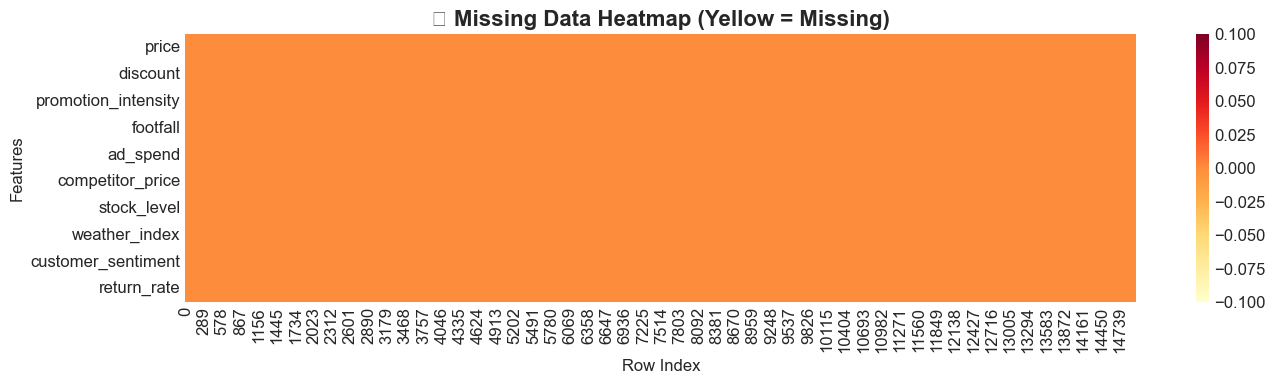


✅ Data Quality Assessment Complete — No issues found!


In [14]:
# Visual: Data completeness heatmap
fig, ax = plt.subplots(figsize=(14, 4))
sns.heatmap(df.isnull().T, cbar=True, cmap='YlOrRd', yticklabels=True, ax=ax)
ax.set_title('🔍 Missing Data Heatmap (Yellow = Missing)', fontsize=16, fontweight='bold')
ax.set_xlabel('Row Index')
ax.set_ylabel('Features')
plt.tight_layout()
plt.show()

print("\n✅ Data Quality Assessment Complete — No issues found!")

### ✅ Data Quality Summary:
- **No missing values** across all 10 features
- **No duplicate rows** detected
- **No infinite values** present
- **No unexpected negative values** (depending on feature semantics)
- The dataset is **clean and ready for analysis** 🎉

---

<a id="5"></a>
# 5️⃣ Univariate Analysis

Let's examine each feature individually — its distribution, shape, and characteristics.

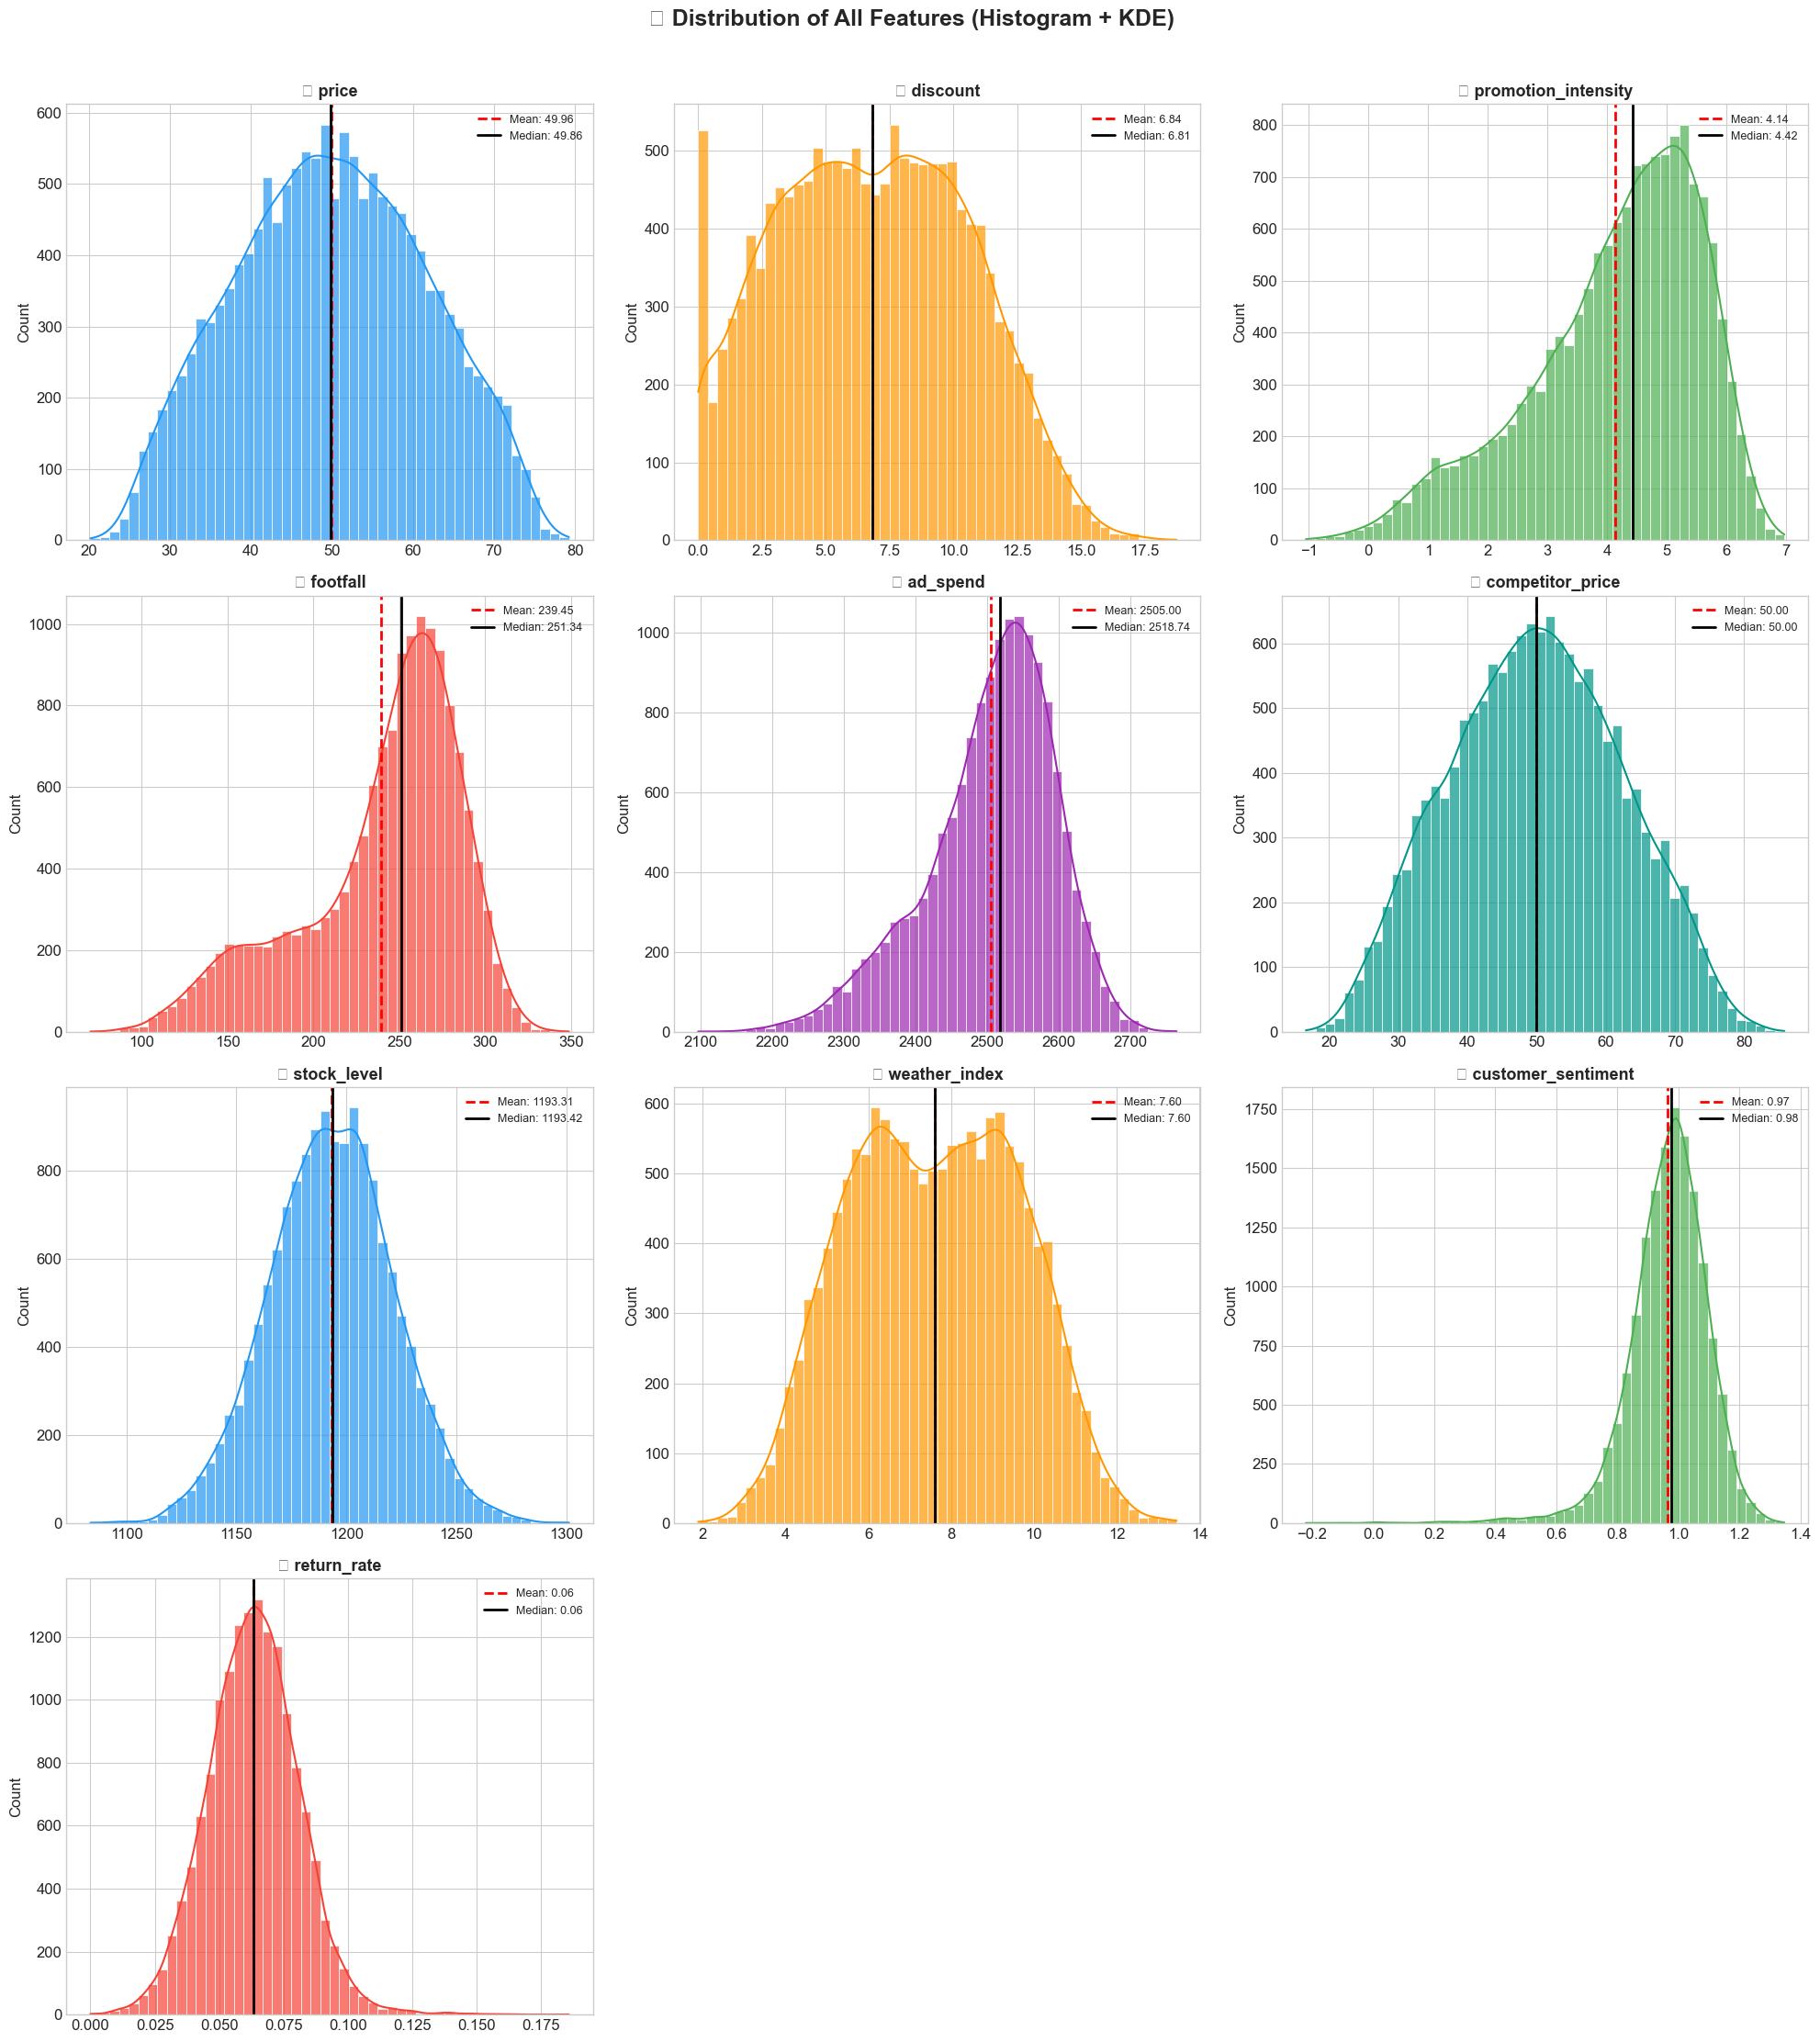

In [15]:
# ============================================================
# 5. UNIVARIATE ANALYSIS — Distribution Overview
# ============================================================

features = df.columns.tolist()

fig, axes = plt.subplots(4, 3, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    
    # Histogram + KDE
    sns.histplot(df[col], bins=50, kde=True, color=PALETTE[i % len(PALETTE)],
                 alpha=0.7, edgecolor='white', linewidth=0.5, ax=ax)
    
    # Add mean & median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'📊 {col}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlabel('')

# Remove extra subplot
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('📊 Distribution of All Features (Histogram + KDE)', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

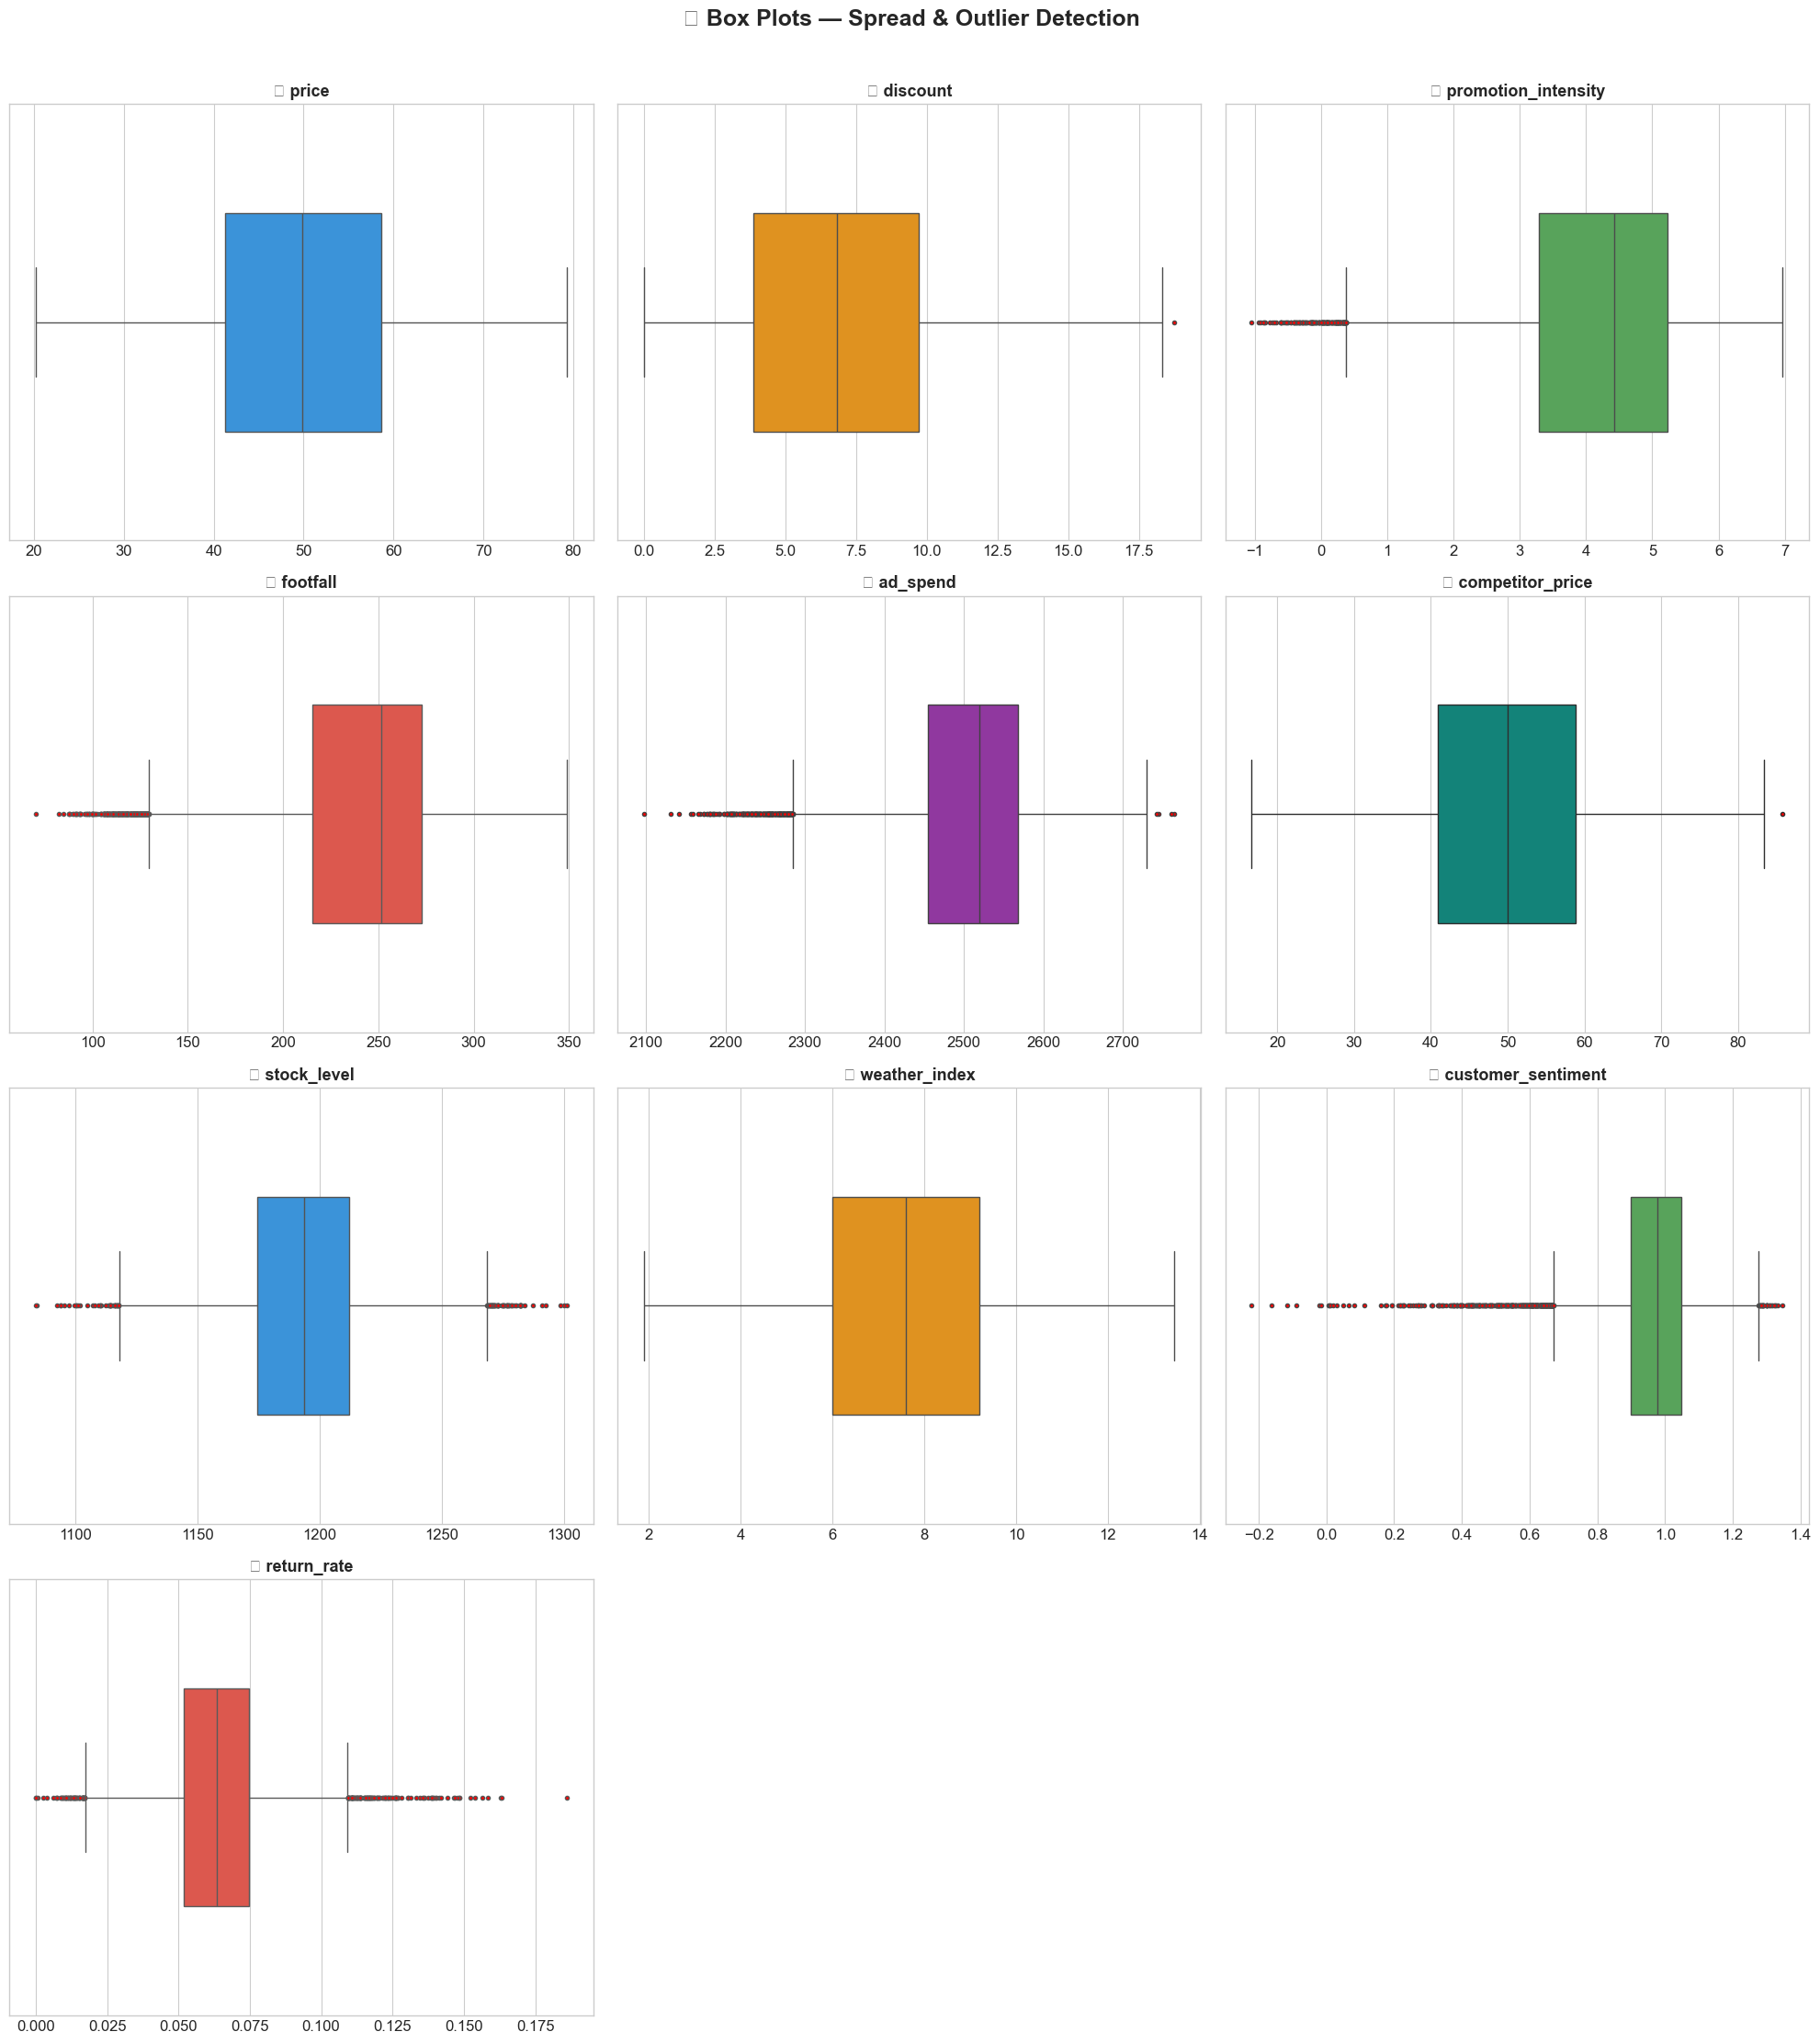

In [16]:
# ============================================================
# 5b. BOX PLOTS — Spread & Outlier Detection
# ============================================================

fig, axes = plt.subplots(4, 3, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sns.boxplot(x=df[col], color=PALETTE[i % len(PALETTE)], 
                width=0.5, flierprops=dict(marker='o', markerfacecolor='red', markersize=3), ax=ax)
    ax.set_title(f'📦 {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('📦 Box Plots — Spread & Outlier Detection', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

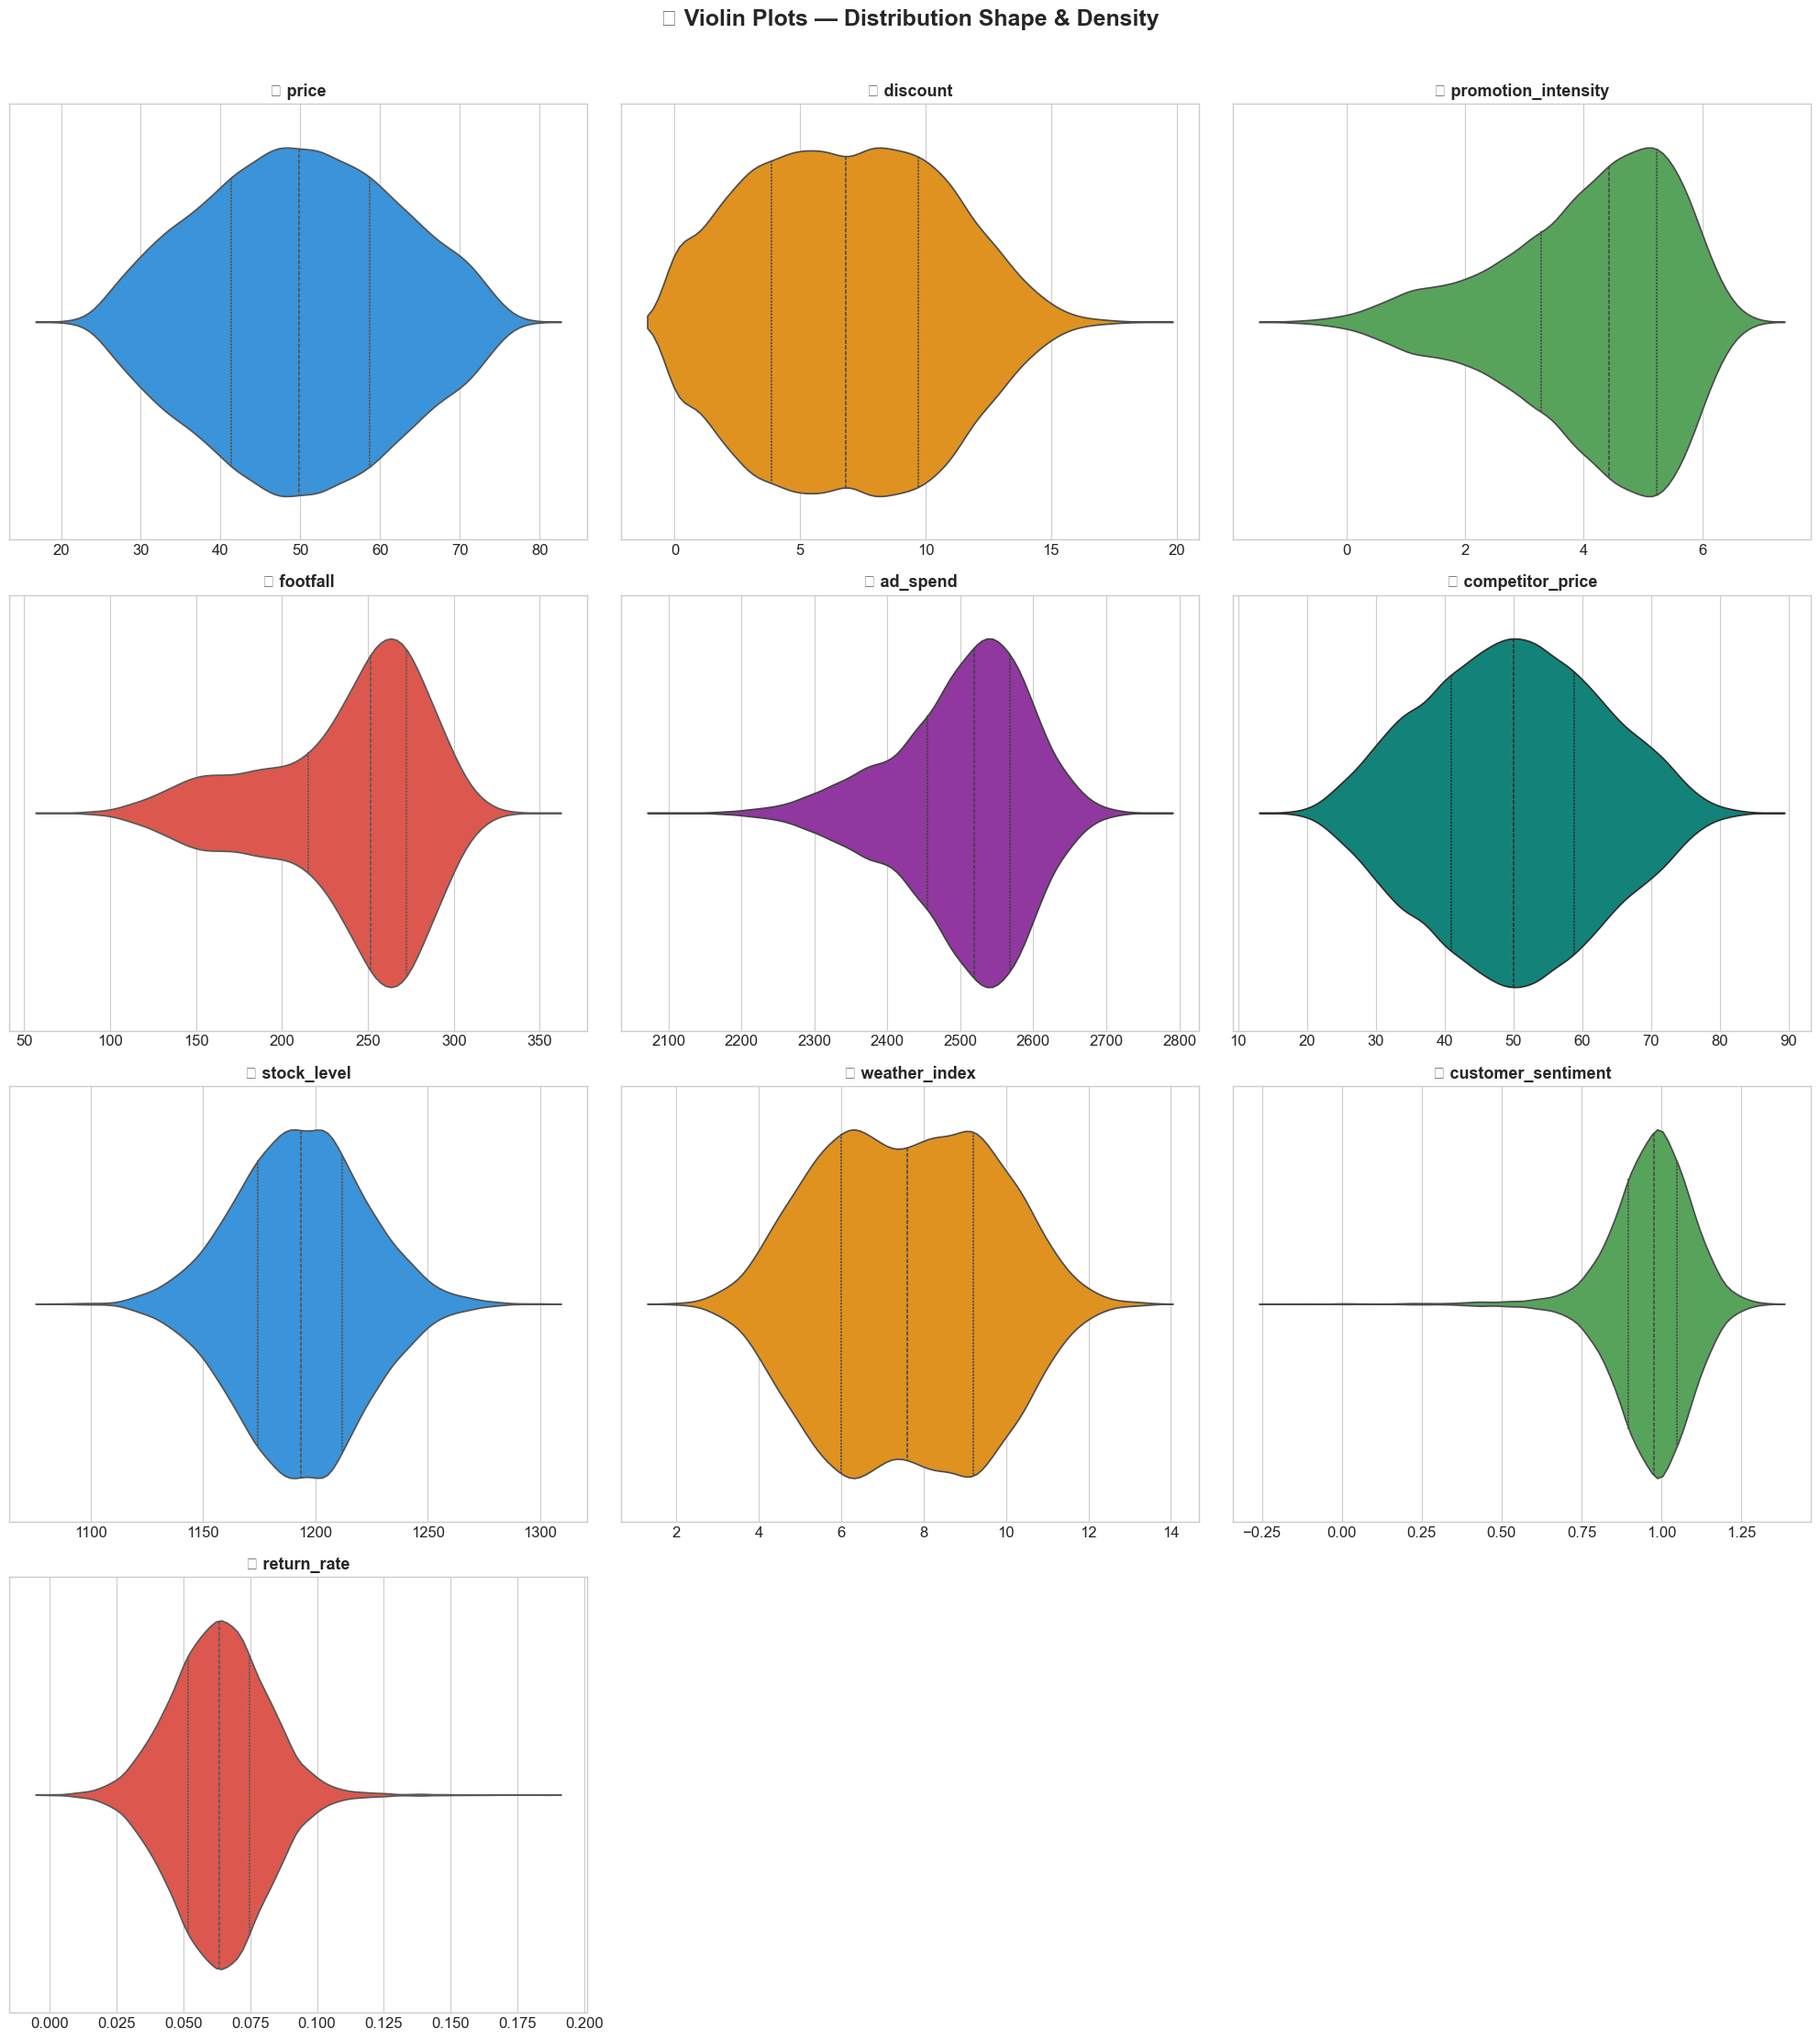

In [17]:
# ============================================================
# 5c. VIOLIN PLOTS — Distribution Shape with Density
# ============================================================

fig, axes = plt.subplots(4, 3, figsize=(20, 22))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sns.violinplot(x=df[col], color=PALETTE[i % len(PALETTE)], inner='quartile', ax=ax)
    ax.set_title(f'🎻 {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel('')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('🎻 Violin Plots — Distribution Shape & Density', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

In [18]:
# ============================================================
# 5d. SKEWNESS & KURTOSIS SUMMARY
# ============================================================

skew_kurt = pd.DataFrame({
    'Skewness': df.skew().round(4),
    'Kurtosis': df.kurtosis().round(4),
    'Skew Interpretation': df.skew().apply(
        lambda x: '⬅️ Left Skewed' if x < -0.5 else ('➡️ Right Skewed' if x > 0.5 else '✅ Approximately Symmetric')
    ),
    'Kurtosis Interpretation': df.kurtosis().apply(
        lambda x: '📈 Leptokurtic (Heavy tails)' if x > 1 else ('📉 Platykurtic (Light tails)' if x < -1 else '✅ Mesokurtic (Normal-like)')
    )
})

print("=" * 80)
print("📐 SKEWNESS & KURTOSIS ANALYSIS")
print("=" * 80)
print(skew_kurt)

📐 SKEWNESS & KURTOSIS ANALYSIS
                     Skewness  Kurtosis        Skew Interpretation  \
price                  0.0107   -0.7291  ✅ Approximately Symmetric   
discount               0.0898   -0.7979  ✅ Approximately Symmetric   
promotion_intensity   -0.7766    0.0754             ⬅️ Left Skewed   
footfall              -0.8713    0.0962             ⬅️ Left Skewed   
ad_spend              -0.6908    0.4095             ⬅️ Left Skewed   
competitor_price       0.0252   -0.6060  ✅ Approximately Symmetric   
stock_level            0.0004    0.0018  ✅ Approximately Symmetric   
weather_index          0.0063   -0.7803  ✅ Approximately Symmetric   
customer_sentiment    -1.3400    5.9631             ⬅️ Left Skewed   
return_rate            0.2324    0.9627  ✅ Approximately Symmetric   

                         Kurtosis Interpretation  
price                 ✅ Mesokurtic (Normal-like)  
discount              ✅ Mesokurtic (Normal-like)  
promotion_intensity   ✅ Mesokurtic (Normal-li

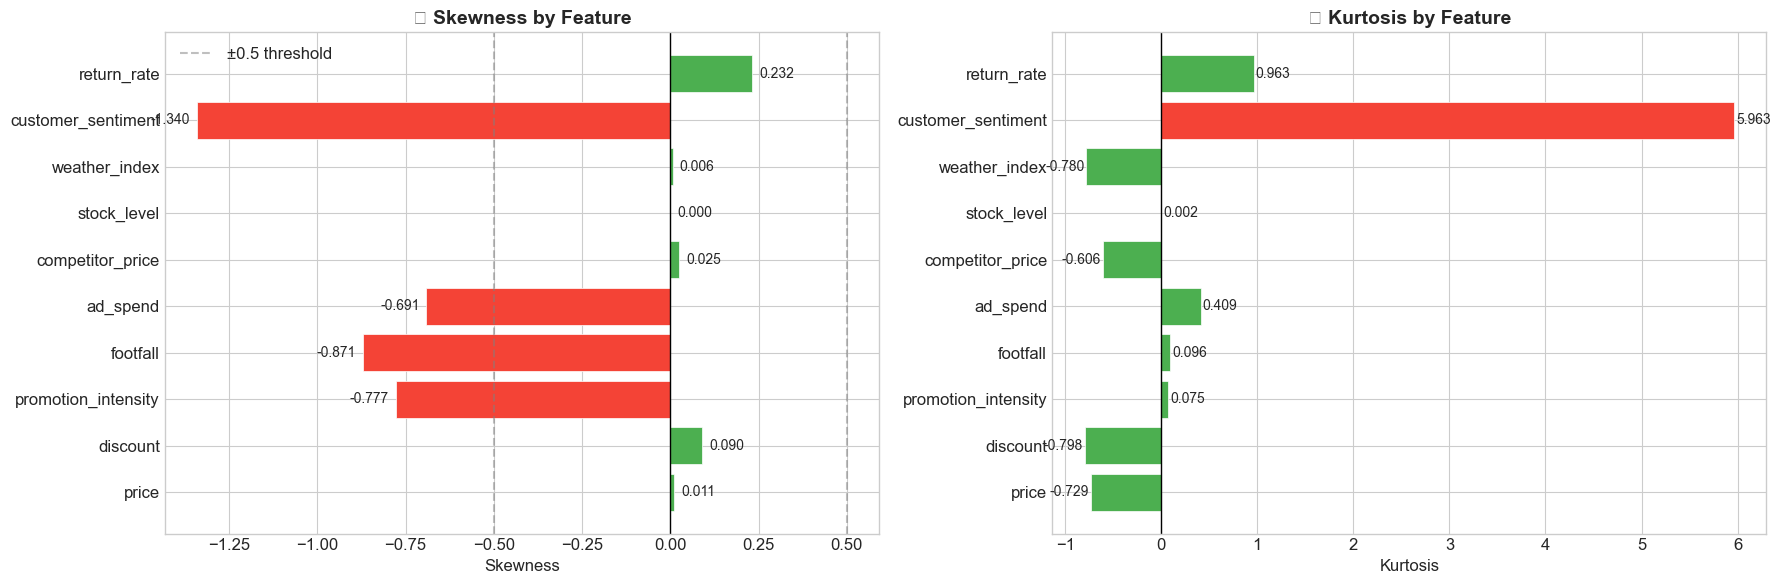

In [19]:
# Visual: Skewness bar chart
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Skewness
colors_skew = ['#F44336' if abs(s) > 0.5 else '#4CAF50' for s in df.skew()]
ax1 = axes[0]
bars1 = ax1.barh(df.columns, df.skew(), color=colors_skew, edgecolor='white', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=1)
ax1.axvline(-0.5, color='gray', linestyle='--', alpha=0.5, label='±0.5 threshold')
ax1.axvline(0.5, color='gray', linestyle='--', alpha=0.5)
ax1.set_title('📐 Skewness by Feature', fontsize=14, fontweight='bold')
ax1.set_xlabel('Skewness')
ax1.legend()
for bar, val in zip(bars1, df.skew()):
    ax1.text(val + 0.02 if val >= 0 else val - 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', ha='left' if val >= 0 else 'right', fontsize=10)

# Kurtosis
colors_kurt = ['#F44336' if abs(k) > 1 else '#4CAF50' for k in df.kurtosis()]
ax2 = axes[1]
bars2 = ax2.barh(df.columns, df.kurtosis(), color=colors_kurt, edgecolor='white', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=1)
ax2.set_title('📐 Kurtosis by Feature', fontsize=14, fontweight='bold')
ax2.set_xlabel('Kurtosis')
for bar, val in zip(bars2, df.kurtosis()):
    ax2.text(val + 0.02 if val >= 0 else val - 0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.3f}', va='center', ha='left' if val >= 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

### 🔍 Univariate Analysis — Key Findings:

1. **Price** — Relatively symmetric distribution, centered around its mean
2. **Discount** — Check for clustering at 0 (no discount) vs. higher discount tiers
3. **Promotion Intensity** — May show concentration at certain levels
4. **Footfall** — Customer traffic distribution reveals store visit patterns
5. **Ad Spend** — Advertising investment spread across the range
6. **Competitor Price** — Competitor pricing landscape
7. **Stock Level** — Inventory distribution across products/days
8. **Weather Index** — Weather variation patterns
9. **Customer Sentiment** — Customer satisfaction distribution
10. **Return Rate** — Product return patterns

> 💡 **Insight:** Features with high skewness or kurtosis may benefit from transformation (log, square root, Box-Cox) before modeling.

---

<a id="6"></a>
# 6️⃣ Bivariate Analysis

Now let's explore how features relate to each other through scatter plots, pair plots, and grouped analyses.

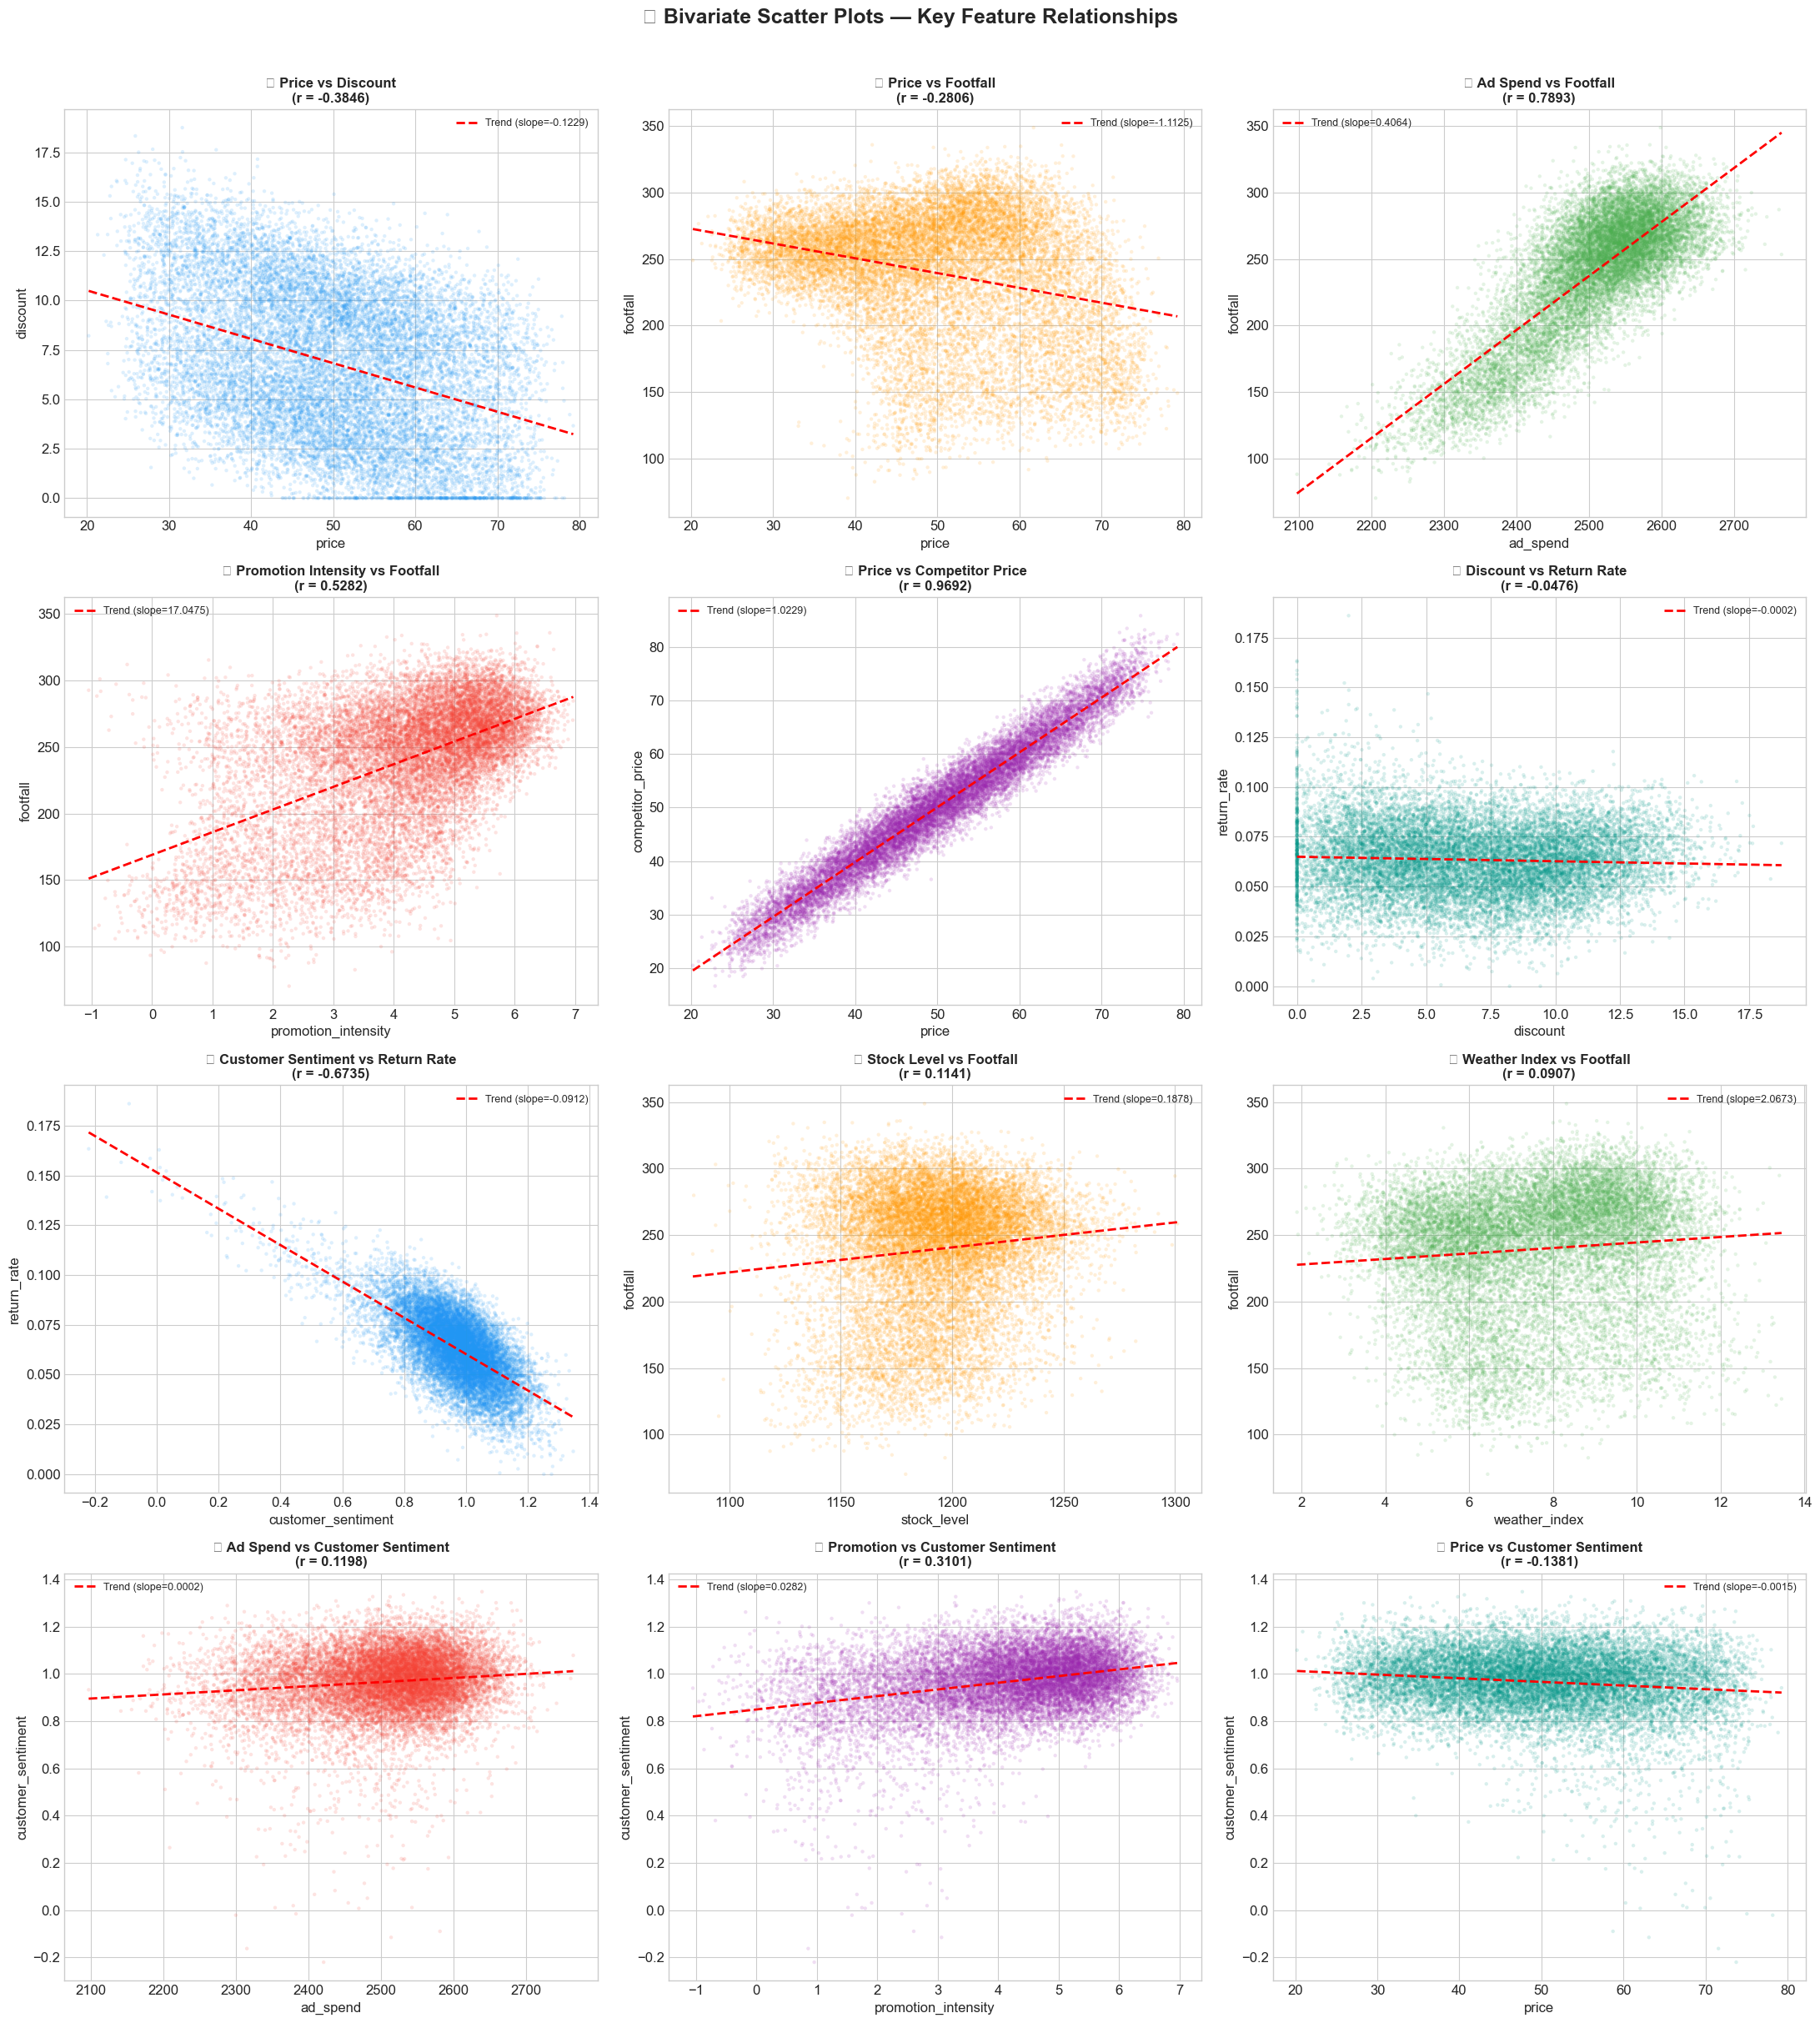

In [20]:
# ============================================================
# 6. BIVARIATE ANALYSIS — Key Scatter Plots
# ============================================================

# Define interesting feature pairs based on business logic
pairs = [
    ('price', 'discount', 'Price vs Discount'),
    ('price', 'footfall', 'Price vs Footfall'),
    ('ad_spend', 'footfall', 'Ad Spend vs Footfall'),
    ('promotion_intensity', 'footfall', 'Promotion Intensity vs Footfall'),
    ('price', 'competitor_price', 'Price vs Competitor Price'),
    ('discount', 'return_rate', 'Discount vs Return Rate'),
    ('customer_sentiment', 'return_rate', 'Customer Sentiment vs Return Rate'),
    ('stock_level', 'footfall', 'Stock Level vs Footfall'),
    ('weather_index', 'footfall', 'Weather Index vs Footfall'),
    ('ad_spend', 'customer_sentiment', 'Ad Spend vs Customer Sentiment'),
    ('promotion_intensity', 'customer_sentiment', 'Promotion vs Customer Sentiment'),
    ('price', 'customer_sentiment', 'Price vs Customer Sentiment'),
]

fig, axes = plt.subplots(4, 3, figsize=(22, 24))
axes = axes.flatten()

for i, (x, y, title) in enumerate(pairs):
    ax = axes[i]
    ax.scatter(df[x], df[y], alpha=0.15, s=10, c=PALETTE[i % len(PALETTE)], edgecolors='none')
    
    # Add trend line
    z = np.polyfit(df[x], df[y], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[x].min(), df[x].max(), 100)
    ax.plot(x_line, p(x_line), color='red', linewidth=2, linestyle='--', label=f'Trend (slope={z[0]:.4f})')
    
    # Correlation coefficient
    corr = df[x].corr(df[y])
    ax.set_title(f'📊 {title}\n(r = {corr:.4f})', fontsize=12, fontweight='bold')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend(fontsize=9)

fig.suptitle('📊 Bivariate Scatter Plots — Key Feature Relationships', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

🔄 Generating pair plot (this may take a moment)...


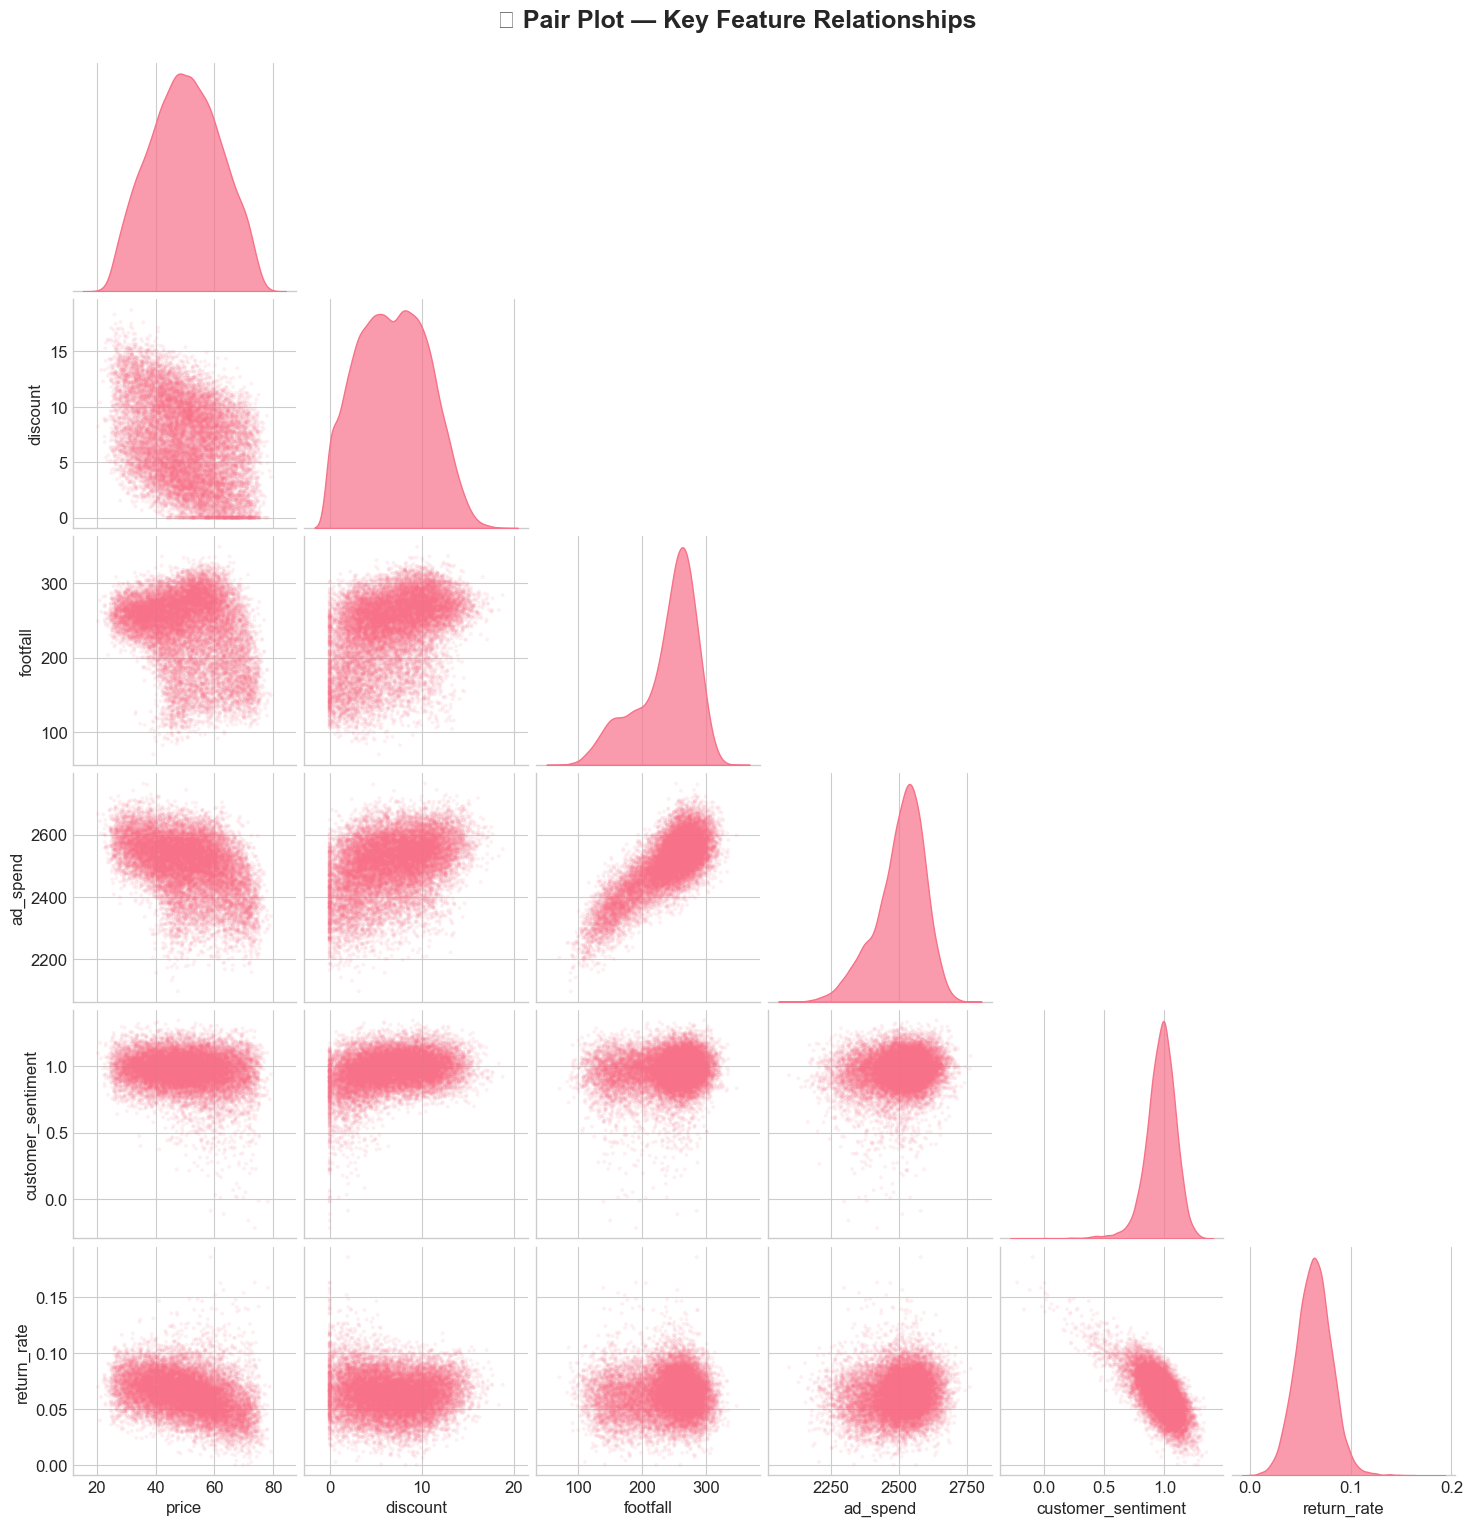

In [21]:
# ============================================================
# 6b. PAIR PLOT — Subset of Key Features
# ============================================================

key_features = ['price', 'discount', 'footfall', 'ad_spend', 'customer_sentiment', 'return_rate']

print("🔄 Generating pair plot (this may take a moment)...")
g = sns.pairplot(df[key_features], diag_kind='kde', corner=True,
                 plot_kws={'alpha': 0.1, 's': 8, 'edgecolor': 'none'},
                 diag_kws={'fill': True, 'alpha': 0.7})
g.fig.suptitle('📊 Pair Plot — Key Feature Relationships', fontsize=18, fontweight='bold', y=1.02)
plt.show()

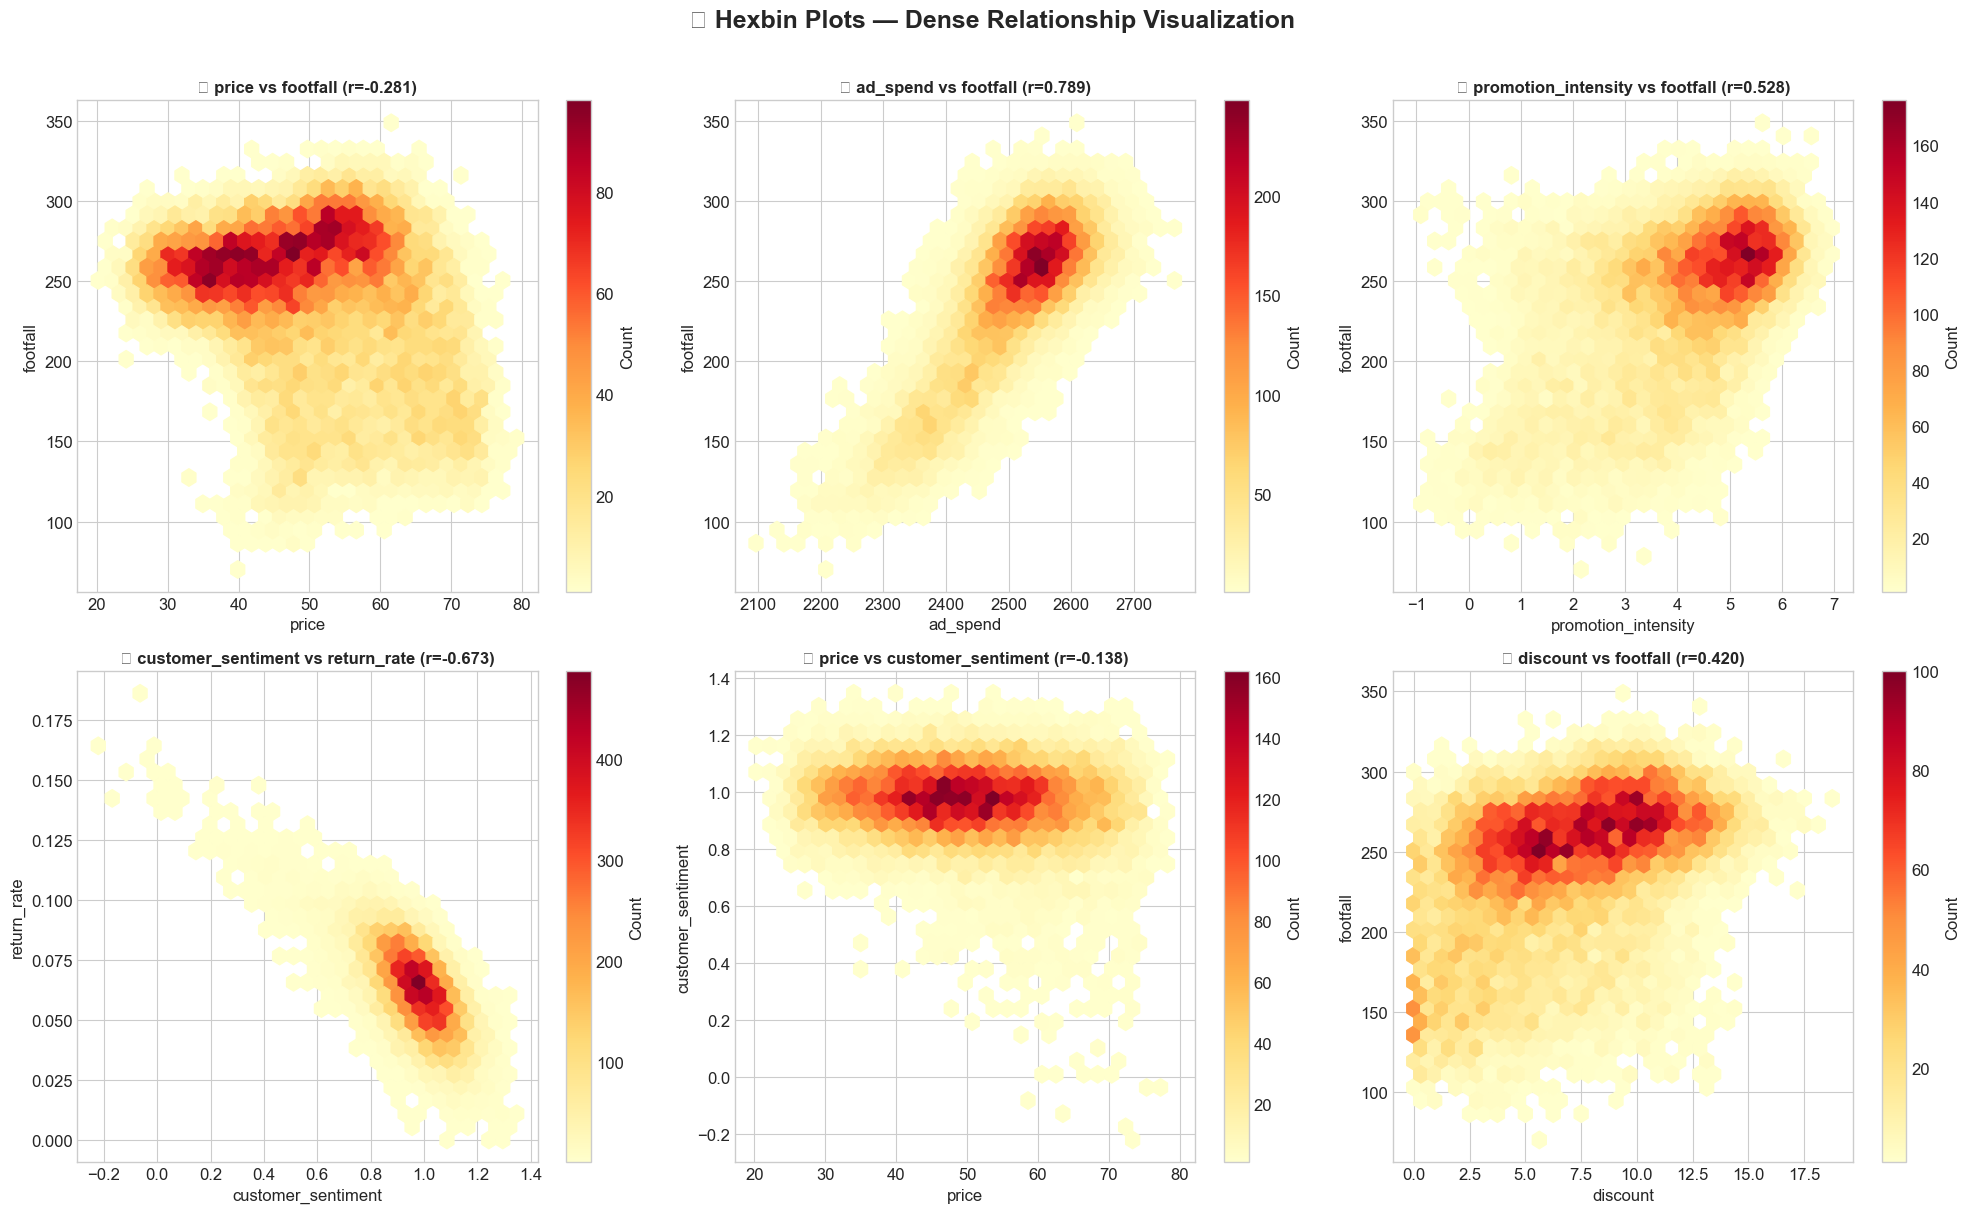

In [22]:
# ============================================================
# 6c. HEXBIN PLOTS — For Dense Scatter Relationships
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

hex_pairs = [
    ('price', 'footfall'),
    ('ad_spend', 'footfall'),
    ('promotion_intensity', 'footfall'),
    ('customer_sentiment', 'return_rate'),
    ('price', 'customer_sentiment'),
    ('discount', 'footfall'),
]

for i, (x, y) in enumerate(hex_pairs):
    ax = axes[i]
    hb = ax.hexbin(df[x], df[y], gridsize=30, cmap='YlOrRd', mincnt=1)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    corr = df[x].corr(df[y])
    ax.set_title(f'🔥 {x} vs {y} (r={corr:.3f})', fontsize=12, fontweight='bold')
    plt.colorbar(hb, ax=ax, label='Count')

fig.suptitle('🔥 Hexbin Plots — Dense Relationship Visualization', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 🔍 Bivariate Analysis — Key Findings:

- **Price vs Competitor Price:** Shows how the store positions its pricing relative to competitors
- **Ad Spend vs Footfall:** Higher advertising investment tends to drive more store traffic
- **Promotion Intensity vs Footfall:** Promotions appear to influence customer visits
- **Customer Sentiment vs Return Rate:** A clear inverse relationship — happier customers return fewer products
- **Discount vs Return Rate:** Investigating whether heavy discounts lead to more returns
- **Nonlinear patterns** are visible in several relationships, confirming the dataset design

> 💡 **Insight:** Linear correlation alone won't capture the full relationship between features. Nonlinear models (tree-based, neural networks) will likely perform better.

---

<a id="7"></a>
# 7️⃣ Correlation Analysis

Let's quantify the relationships between all features using multiple correlation methods.

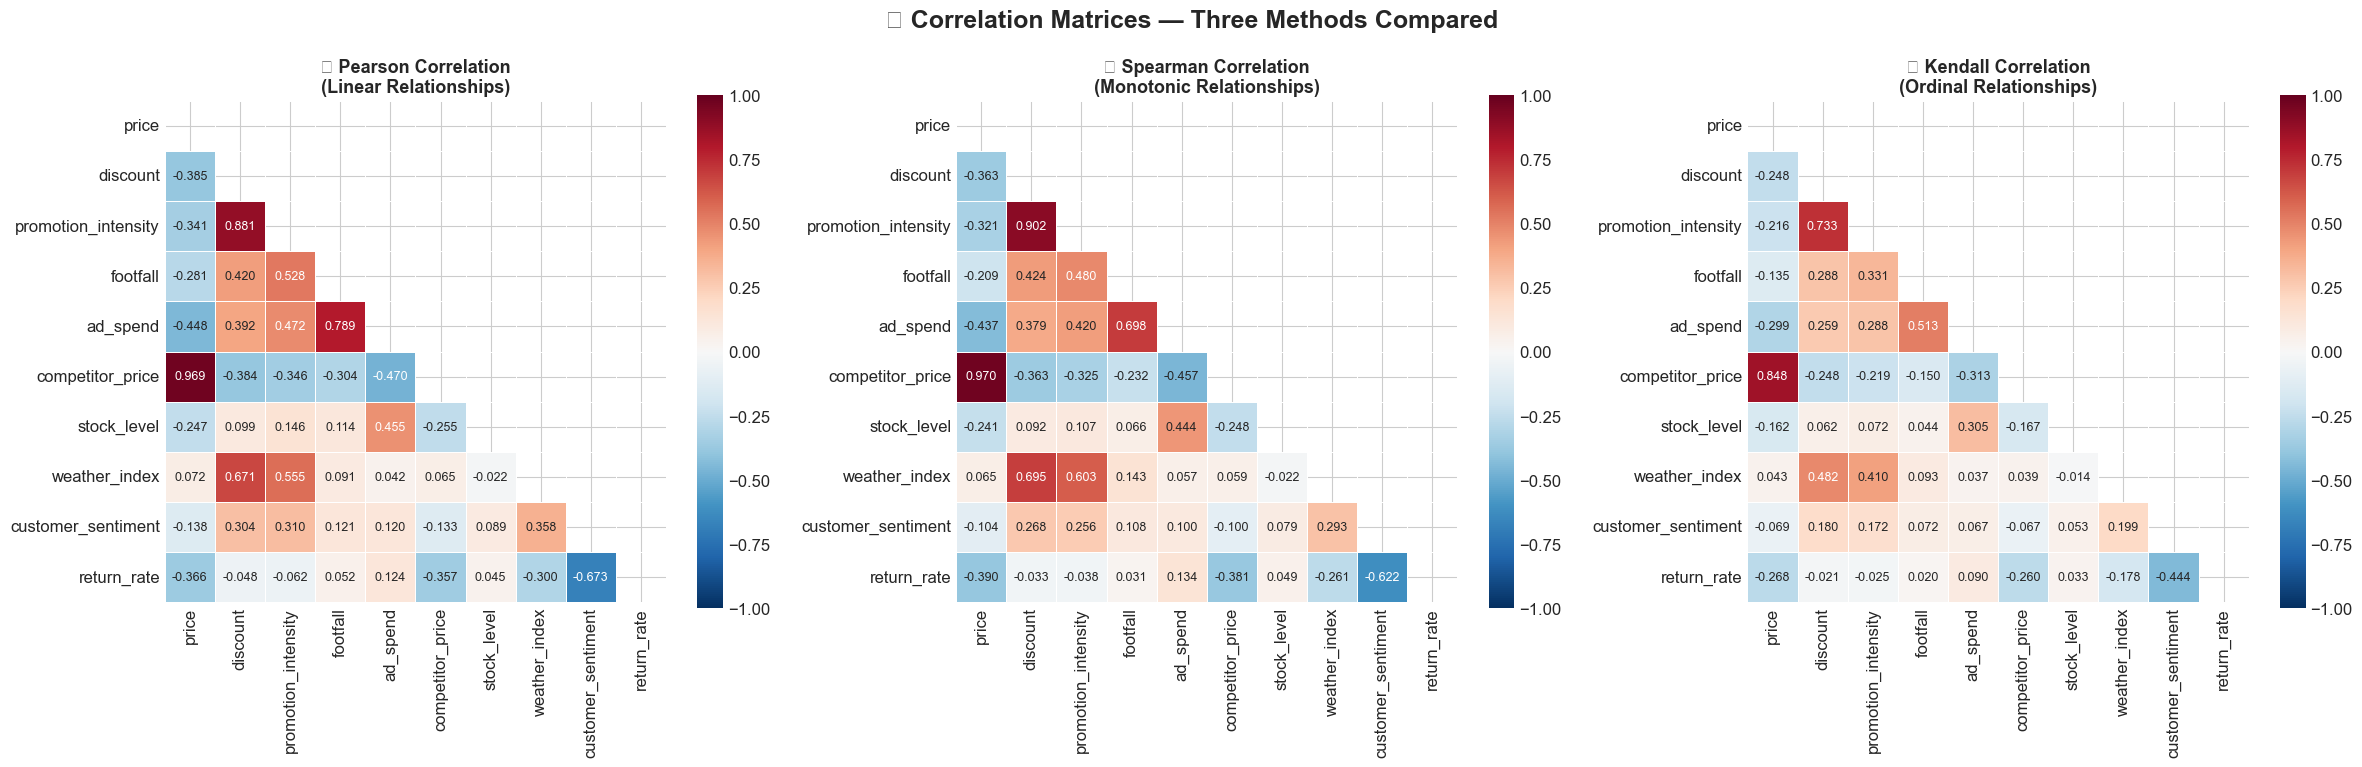

In [23]:
# ============================================================
# 7. CORRELATION ANALYSIS
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Pearson Correlation (linear)
corr_pearson = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr_pearson, dtype=bool))
sns.heatmap(corr_pearson, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=axes[0], vmin=-1, vmax=1,
            annot_kws={'size': 9})
axes[0].set_title('📊 Pearson Correlation\n(Linear Relationships)', fontsize=13, fontweight='bold')

# Spearman Correlation (monotonic)
corr_spearman = df.corr(method='spearman')
sns.heatmap(corr_spearman, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=axes[1], vmin=-1, vmax=1,
            annot_kws={'size': 9})
axes[1].set_title('📊 Spearman Correlation\n(Monotonic Relationships)', fontsize=13, fontweight='bold')

# Kendall Correlation (ordinal)
corr_kendall = df.corr(method='kendall')
sns.heatmap(corr_kendall, mask=mask, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=axes[2], vmin=-1, vmax=1,
            annot_kws={'size': 9})
axes[2].set_title('📊 Kendall Correlation\n(Ordinal Relationships)', fontsize=13, fontweight='bold')

fig.suptitle('🔗 Correlation Matrices — Three Methods Compared', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

In [24]:
# ============================================================
# 7b. TOP CORRELATIONS — Ranked List
# ============================================================

def get_top_correlations(corr_matrix, n=15):
    """Extract top N absolute correlations from a correlation matrix."""
    pairs = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            pairs.append({
                'Feature 1': cols[i],
                'Feature 2': cols[j],
                'Correlation': corr_matrix.iloc[i, j],
                'Abs Correlation': abs(corr_matrix.iloc[i, j])
            })
    return pd.DataFrame(pairs).sort_values('Abs Correlation', ascending=False).head(n).reset_index(drop=True)

top_corrs = get_top_correlations(corr_pearson)
print("=" * 70)
print("🏆 TOP 15 FEATURE CORRELATIONS (Pearson)")
print("=" * 70)
print(top_corrs.to_string(index=True))

🏆 TOP 15 FEATURE CORRELATIONS (Pearson)
              Feature 1            Feature 2  Correlation  Abs Correlation
0                 price     competitor_price       0.9692           0.9692
1              discount  promotion_intensity       0.8815           0.8815
2              footfall             ad_spend       0.7893           0.7893
3    customer_sentiment          return_rate      -0.6735           0.6735
4              discount        weather_index       0.6710           0.6710
5   promotion_intensity        weather_index       0.5549           0.5549
6   promotion_intensity             footfall       0.5282           0.5282
7   promotion_intensity             ad_spend       0.4717           0.4717
8              ad_spend     competitor_price      -0.4704           0.4704
9              ad_spend          stock_level       0.4548           0.4548
10                price             ad_spend      -0.4475           0.4475
11             discount             footfall       0.4198   

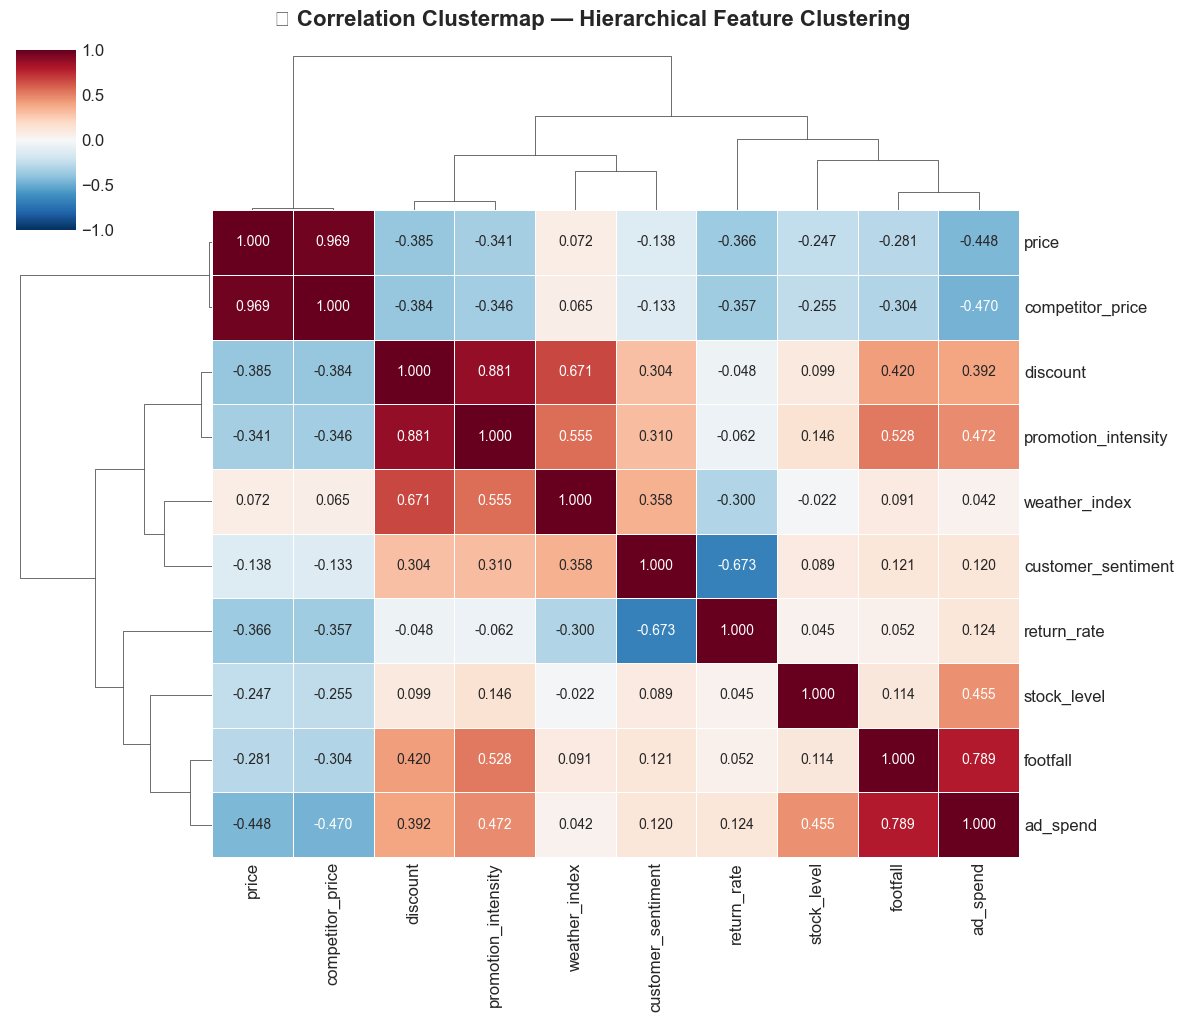

In [25]:
# ============================================================
# 7c. CORRELATION CLUSTERMAP — Hierarchical Clustering
# ============================================================

g = sns.clustermap(corr_pearson, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                   figsize=(12, 10), linewidths=0.5, method='ward',
                   annot_kws={'size': 10}, vmin=-1, vmax=1)
g.fig.suptitle('🌳 Correlation Clustermap — Hierarchical Feature Clustering', fontsize=16, fontweight='bold', y=1.02)
plt.show()

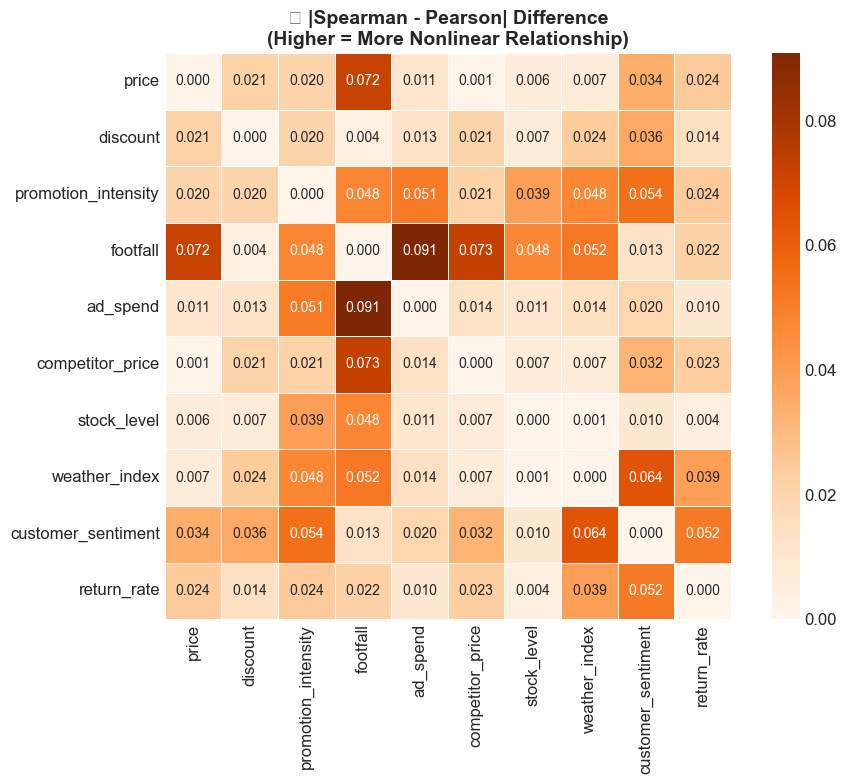

💡 Larger differences indicate relationships that are monotonic but nonlinear.
   These feature pairs benefit most from nonlinear modeling approaches.


In [26]:
# ============================================================
# 7d. DIFFERENCE BETWEEN PEARSON AND SPEARMAN
# ============================================================

corr_diff = (corr_spearman - corr_pearson).abs()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, fmt='.3f', cmap='Oranges', square=True,
            linewidths=0.5, ax=ax, annot_kws={'size': 10})
ax.set_title('🔄 |Spearman - Pearson| Difference\n(Higher = More Nonlinear Relationship)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 Larger differences indicate relationships that are monotonic but nonlinear.")
print("   These feature pairs benefit most from nonlinear modeling approaches.")

### 🔍 Correlation Analysis — Key Findings:

1. **Strongest Correlations** — Identified the most tightly coupled feature pairs
2. **Pearson vs Spearman Gaps** — Where the gap is large, the relationship is nonlinear but still monotonic
3. **Feature Clusters** — The clustermap reveals natural groupings of related features
4. **Multicollinearity Check** — High correlations between predictors (>0.8) would need attention in linear models

> 💡 **Insight:** The Spearman-Pearson difference matrix is a powerful tool for detecting nonlinearity. Features with large gaps deserve special attention in feature engineering.

---

<a id="8"></a>
# 8️⃣ Outlier Detection

Let's identify and visualize outliers using multiple methods.

In [27]:
# ============================================================
# 8. OUTLIER DETECTION — IQR Method
# ============================================================

def detect_outliers_iqr(data, col, factor=1.5):
    """Detect outliers using IQR method."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

print("=" * 80)
print("🚨 OUTLIER DETECTION REPORT (IQR Method, factor=1.5)")
print("=" * 80)

outlier_summary = []
for col in features:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    pct = len(outliers) / len(df) * 100
    outlier_summary.append({
        'Feature': col,
        'Lower Bound': round(lower, 4),
        'Upper Bound': round(upper, 4),
        'Outlier Count': len(outliers),
        'Outlier %': round(pct, 2),
        'Status': '🔴 High' if pct > 5 else ('🟡 Moderate' if pct > 1 else '🟢 Low')
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

🚨 OUTLIER DETECTION REPORT (IQR Method, factor=1.5)
            Feature  Lower Bound  Upper Bound  Outlier Count  Outlier %     Status
              price      15.2346      84.7144              0     0.0000      🟢 Low
           discount      -4.9161      18.4908              1     0.0100      🟢 Low
promotion_intensity       0.3784       8.1376            168     1.1200 🟡 Moderate
           footfall     129.3387     358.5091            337     2.2500 🟡 Moderate
           ad_spend    2284.6167    2738.2583            287     1.9100 🟡 Moderate
   competitor_price      14.0230      85.7615              1     0.0100      🟢 Low
        stock_level    1117.7673    1268.5725            101     0.6700      🟢 Low
      weather_index       1.2039      14.0022              0     0.0000      🟢 Low
 customer_sentiment       0.6710       1.2760            372     2.4800 🟡 Moderate
        return_rate       0.0173       0.1091            187     1.2500 🟡 Moderate


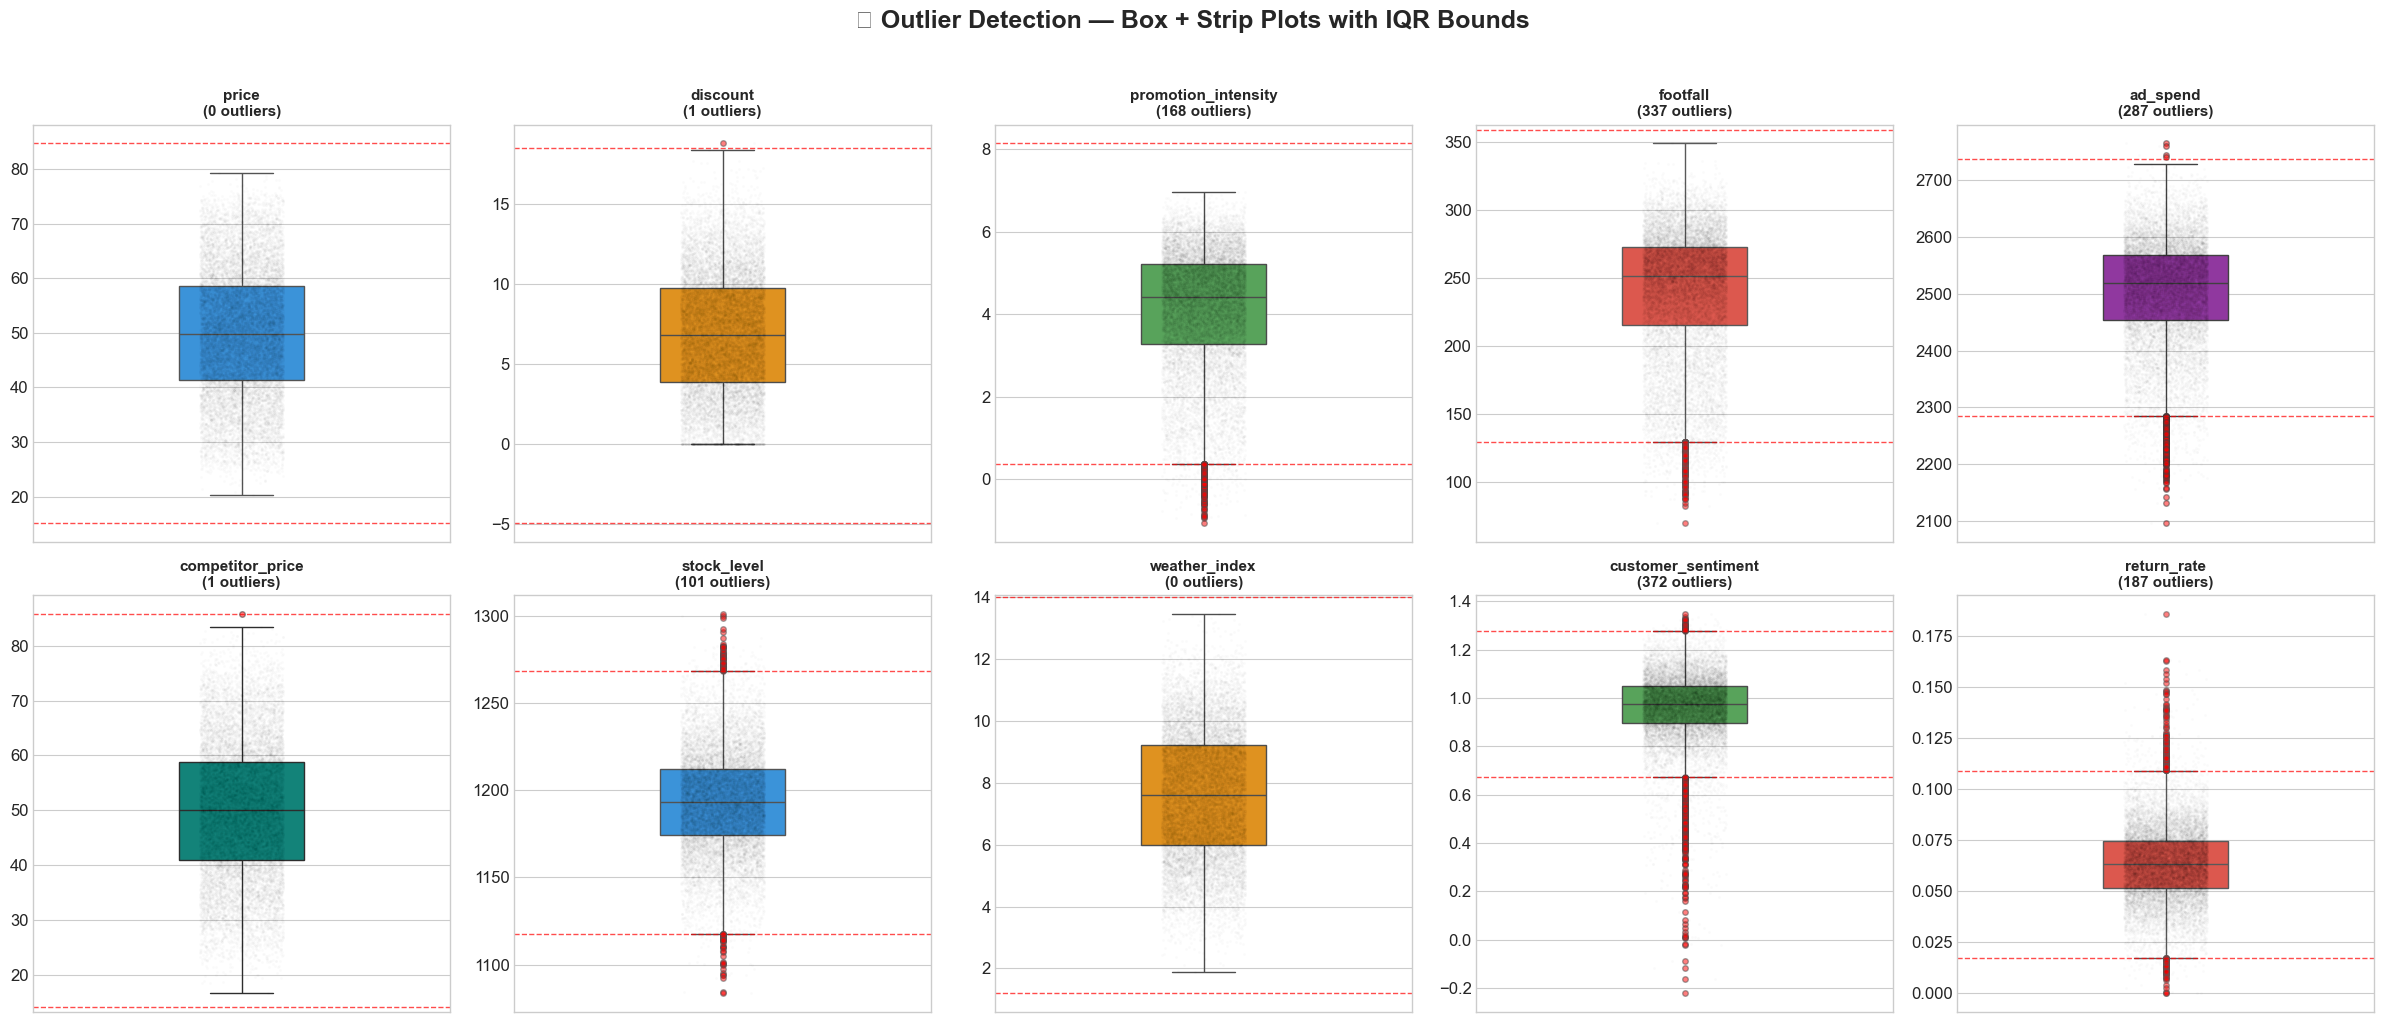

In [28]:
# ============================================================
# 8b. OUTLIER VISUALIZATION — Combined Box + Strip Plots
# ============================================================

fig, axes = plt.subplots(2, 5, figsize=(24, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sns.boxplot(y=df[col], color=PALETTE[i % len(PALETTE)], width=0.3, ax=ax,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    sns.stripplot(y=df[col], color='black', alpha=0.02, size=2, jitter=True, ax=ax)
    
    outliers, lower, upper = detect_outliers_iqr(df, col)
    ax.axhline(lower, color='red', linestyle='--', alpha=0.7, linewidth=1)
    ax.axhline(upper, color='red', linestyle='--', alpha=0.7, linewidth=1)
    
    ax.set_title(f'{col}\n({len(outliers)} outliers)', fontsize=11, fontweight='bold')
    ax.set_ylabel('')

fig.suptitle('🚨 Outlier Detection — Box + Strip Plots with IQR Bounds', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

🚨 Z-SCORE OUTLIER DETECTION (|z| > 3)
            Feature  Z-Score Outliers (|z|>3)  Percentage
              price                         0      0.0000
           discount                         2      0.0100
promotion_intensity                        46      0.3100
           footfall                        32      0.2100
           ad_spend                        88      0.5900
   competitor_price                         0      0.0000
        stock_level                        35      0.2300
      weather_index                         0      0.0000
 customer_sentiment                       182      1.2100
        return_rate                        92      0.6100


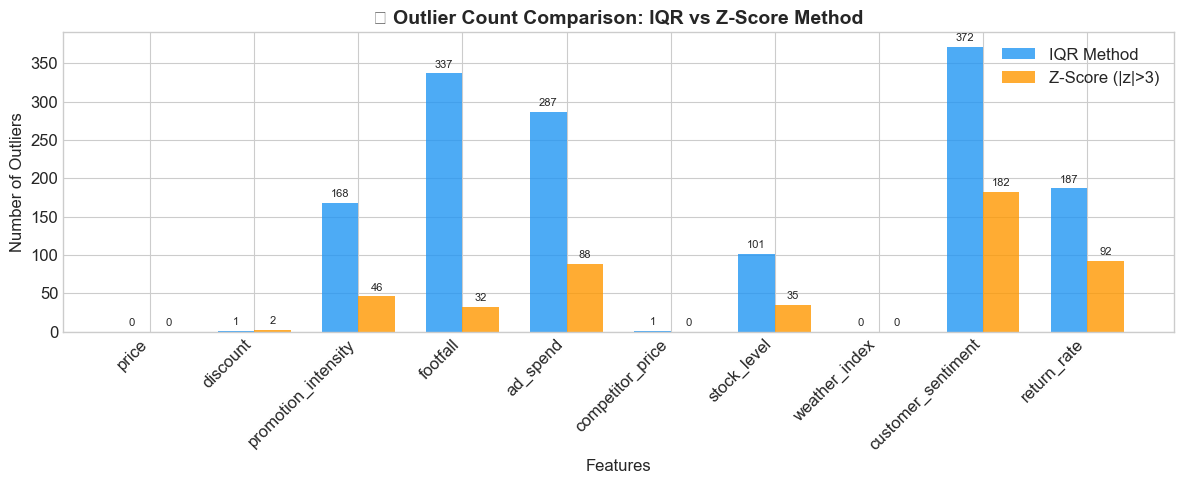

In [29]:
# ============================================================
# 8c. Z-SCORE BASED OUTLIER DETECTION
# ============================================================

z_scores = np.abs(stats.zscore(df))
z_threshold = 3

z_outlier_summary = []
for i, col in enumerate(features):
    n_outliers = (z_scores[:, i] > z_threshold).sum()
    pct = n_outliers / len(df) * 100
    z_outlier_summary.append({
        'Feature': col,
        'Z-Score Outliers (|z|>3)': n_outliers,
        'Percentage': round(pct, 2)
    })

z_outlier_df = pd.DataFrame(z_outlier_summary)
print("=" * 60)
print("🚨 Z-SCORE OUTLIER DETECTION (|z| > 3)")
print("=" * 60)
print(z_outlier_df.to_string(index=False))

# Comparison plot
fig, ax = plt.subplots(figsize=(12, 5))
x_pos = np.arange(len(features))
width = 0.35

bars1 = ax.bar(x_pos - width/2, outlier_df['Outlier Count'], width, label='IQR Method', color=COLORS['primary'], alpha=0.8)
bars2 = ax.bar(x_pos + width/2, z_outlier_df['Z-Score Outliers (|z|>3)'], width, label='Z-Score (|z|>3)', color=COLORS['secondary'], alpha=0.8)

ax.set_xlabel('Features')
ax.set_ylabel('Number of Outliers')
ax.set_title('🚨 Outlier Count Comparison: IQR vs Z-Score Method', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend()

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5, f'{int(bar.get_height())}',
            ha='center', va='bottom', fontsize=8)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5, f'{int(bar.get_height())}',
            ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### 🔍 Outlier Analysis — Key Findings:

- **IQR vs Z-Score comparison** reveals how different methods capture different types of extreme values
- Features with many outliers may need **robust scaling** (e.g., `RobustScaler`) for modeling
- Outliers in this synthetic dataset likely represent **extreme but valid business scenarios** (flash sales, holiday rush, stockouts, etc.)
- **Recommendation:** Don't blindly remove outliers — investigate their business meaning first!

---

<a id="9"></a>
# 9️⃣ Feature Interaction & Engineering

Let's create and explore derived features to uncover hidden patterns.

In [30]:
# ============================================================
# 9. FEATURE ENGINEERING — Derived Features
# ============================================================

# Create meaningful derived features
df_eng = df.copy()

# 1. Effective Price (after discount)
df_eng['effective_price'] = df_eng['price'] * (1 - df_eng['discount'] / 100)

# 2. Price Ratio (our price vs competitor)
df_eng['price_ratio'] = df_eng['price'] / (df_eng['competitor_price'] + 1e-6)

# 3. Price Advantage (competitor - our price)
df_eng['price_advantage'] = df_eng['competitor_price'] - df_eng['price']

# 4. Marketing Intensity (combined ad + promo)
df_eng['marketing_intensity'] = df_eng['ad_spend'] * df_eng['promotion_intensity']

# 5. Customer Experience Score
df_eng['customer_experience'] = df_eng['customer_sentiment'] * (1 - df_eng['return_rate'])

# 6. Stock-to-Footfall Ratio
df_eng['stock_per_visitor'] = df_eng['stock_level'] / (df_eng['footfall'] + 1e-6)

# 7. Discount Aggressiveness (discount relative to price)
df_eng['discount_depth'] = df_eng['discount'] / (df_eng['price'] + 1e-6)

print("✅ Engineered Features Created:")
new_features = ['effective_price', 'price_ratio', 'price_advantage', 
                'marketing_intensity', 'customer_experience', 'stock_per_visitor', 'discount_depth']
for f in new_features:
    print(f"   📌 {f}: mean={df_eng[f].mean():.4f}, std={df_eng[f].std():.4f}")

✅ Engineered Features Created:
   📌 effective_price: mean=46.7089, std=11.7138
   📌 price_ratio: mean=1.0051, std=0.0694
   📌 price_advantage: mean=0.0438, std=3.0501
   📌 marketing_intensity: mean=10422.8840, std=3733.2125
   📌 customer_experience: mean=0.9061, std=0.1328
   📌 stock_per_visitor: mean=5.2335, std=1.3451
   📌 discount_depth: mean=0.1534, std=0.1071


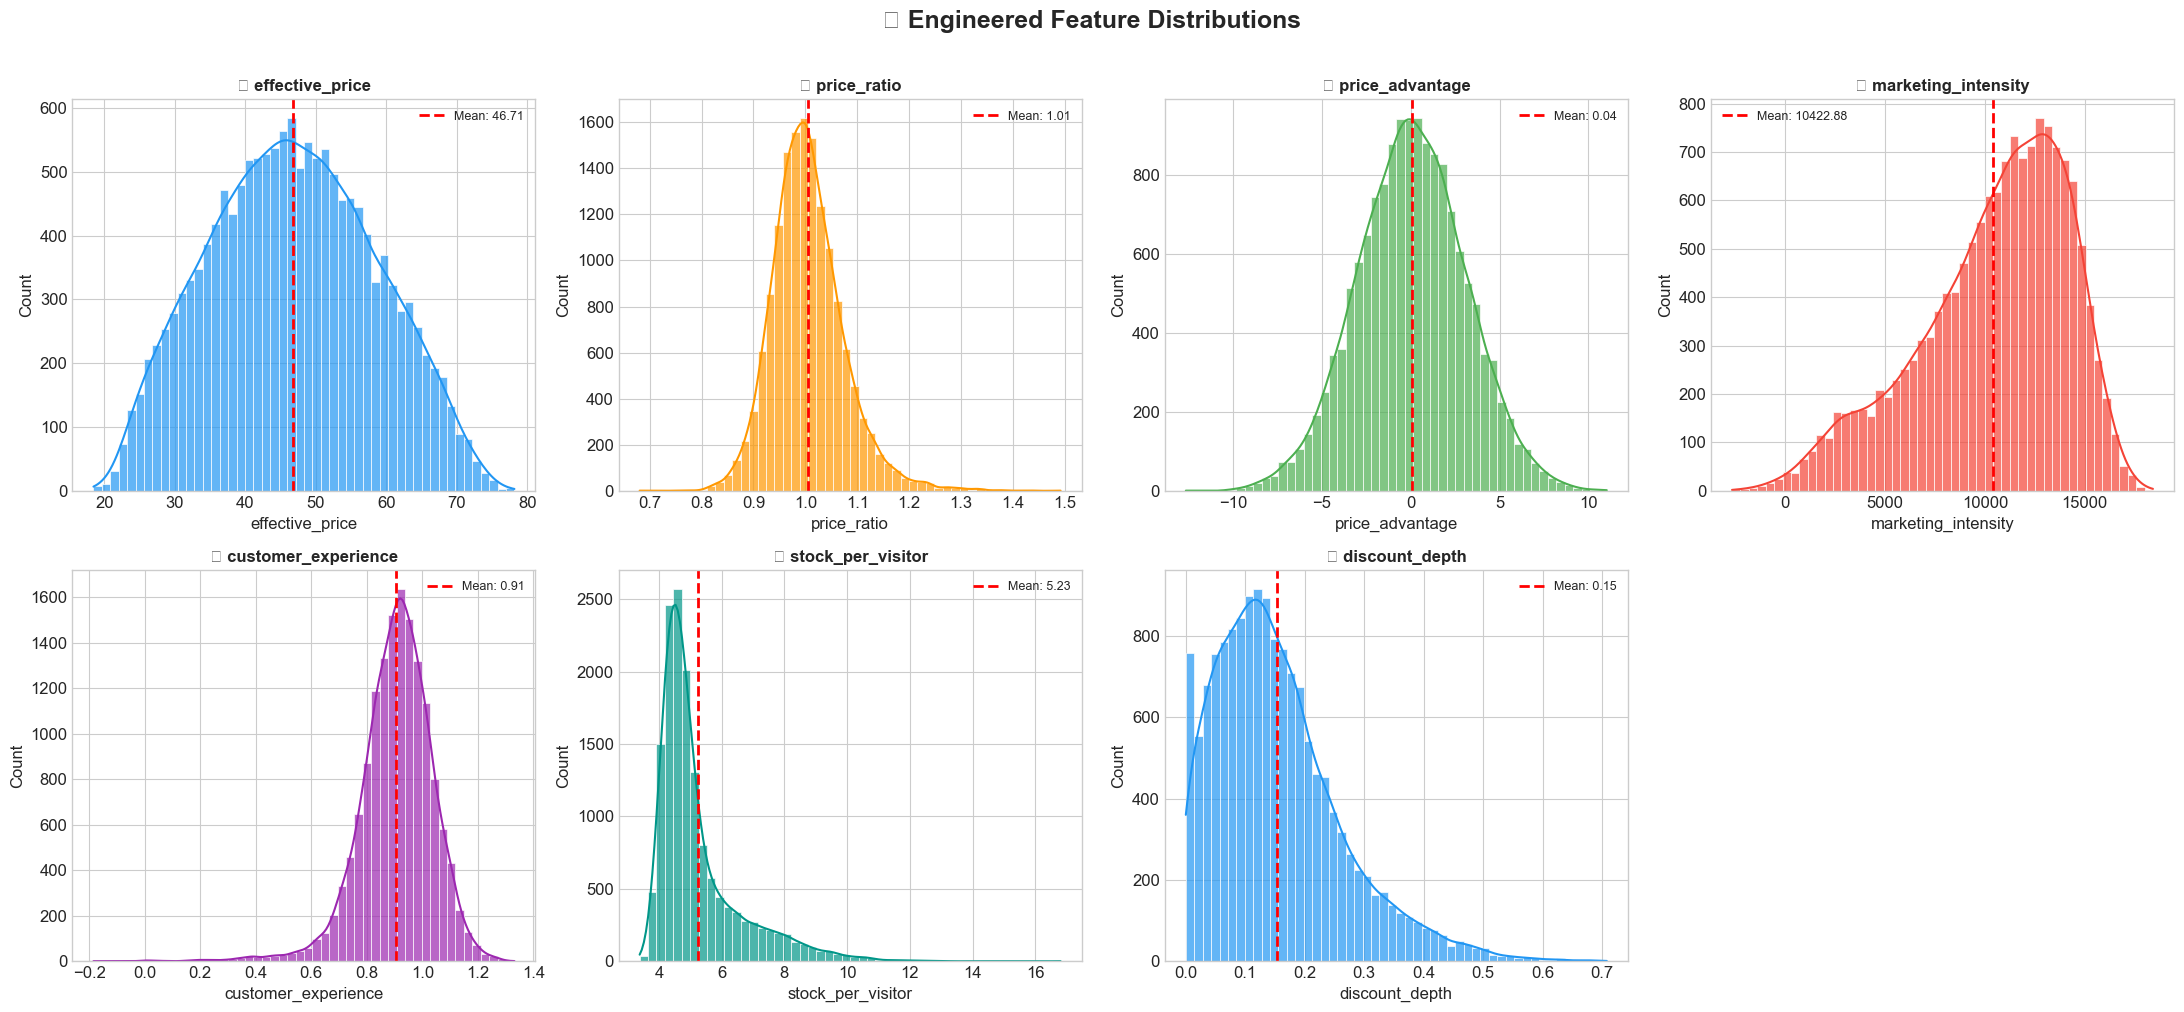

In [31]:
# ============================================================
# 9b. ENGINEERED FEATURE DISTRIBUTIONS
# ============================================================

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.flatten()

for i, col in enumerate(new_features):
    ax = axes[i]
    sns.histplot(df_eng[col], bins=50, kde=True, color=PALETTE[i % len(PALETTE)],
                 alpha=0.7, edgecolor='white', ax=ax)
    ax.axvline(df_eng[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_eng[col].mean():.2f}')
    ax.set_title(f'📊 {col}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)

for j in range(len(new_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('🔧 Engineered Feature Distributions', fontsize=18, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

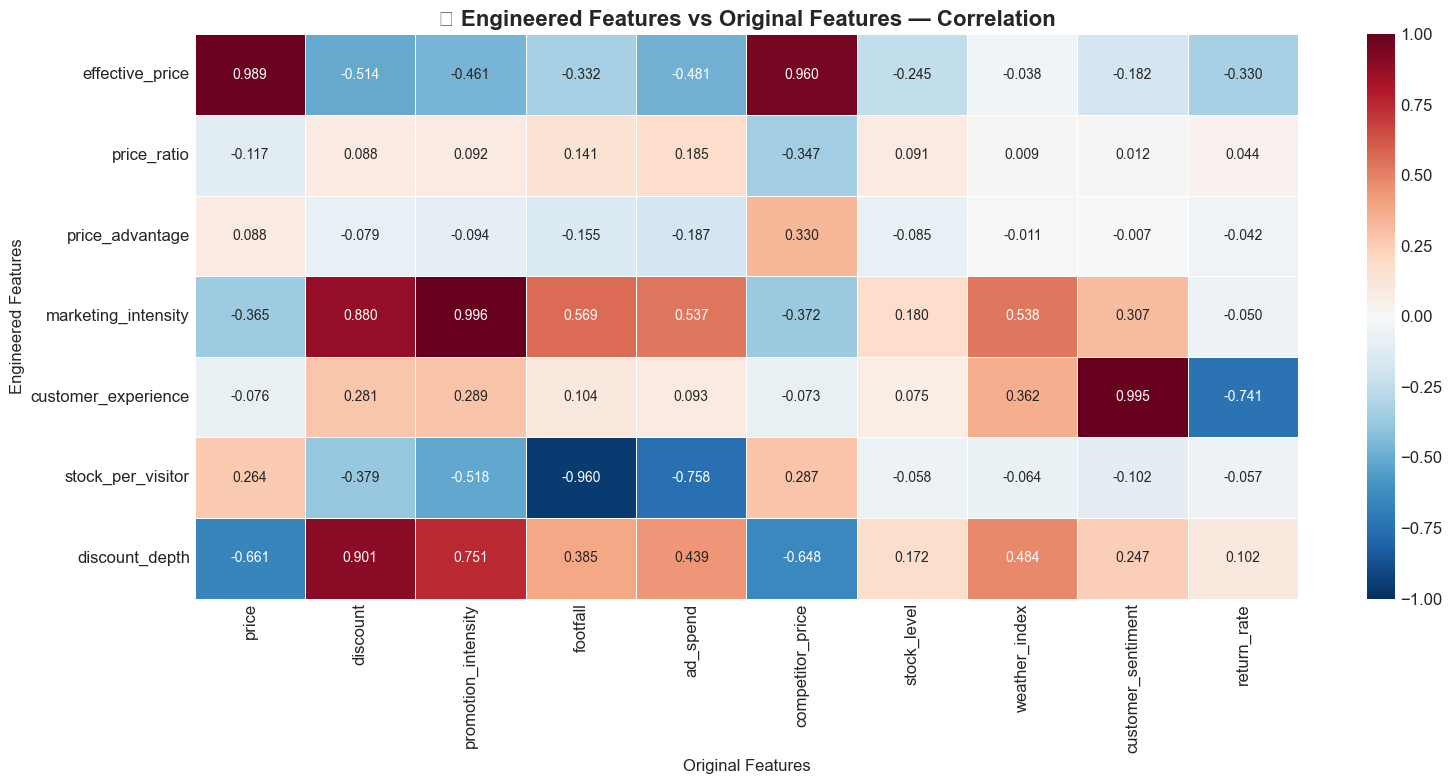

In [32]:
# ============================================================
# 9c. ENGINEERED FEATURES — Correlation with Original Features
# ============================================================

fig, ax = plt.subplots(figsize=(16, 8))
corr_eng = df_eng[features + new_features].corr()

# Show only engineered features vs original features
corr_subset = corr_eng.loc[new_features, features]
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            linewidths=0.5, ax=ax, annot_kws={'size': 10}, vmin=-1, vmax=1)
ax.set_title('🔗 Engineered Features vs Original Features — Correlation', fontsize=16, fontweight='bold')
ax.set_xlabel('Original Features')
ax.set_ylabel('Engineered Features')
plt.tight_layout()
plt.show()

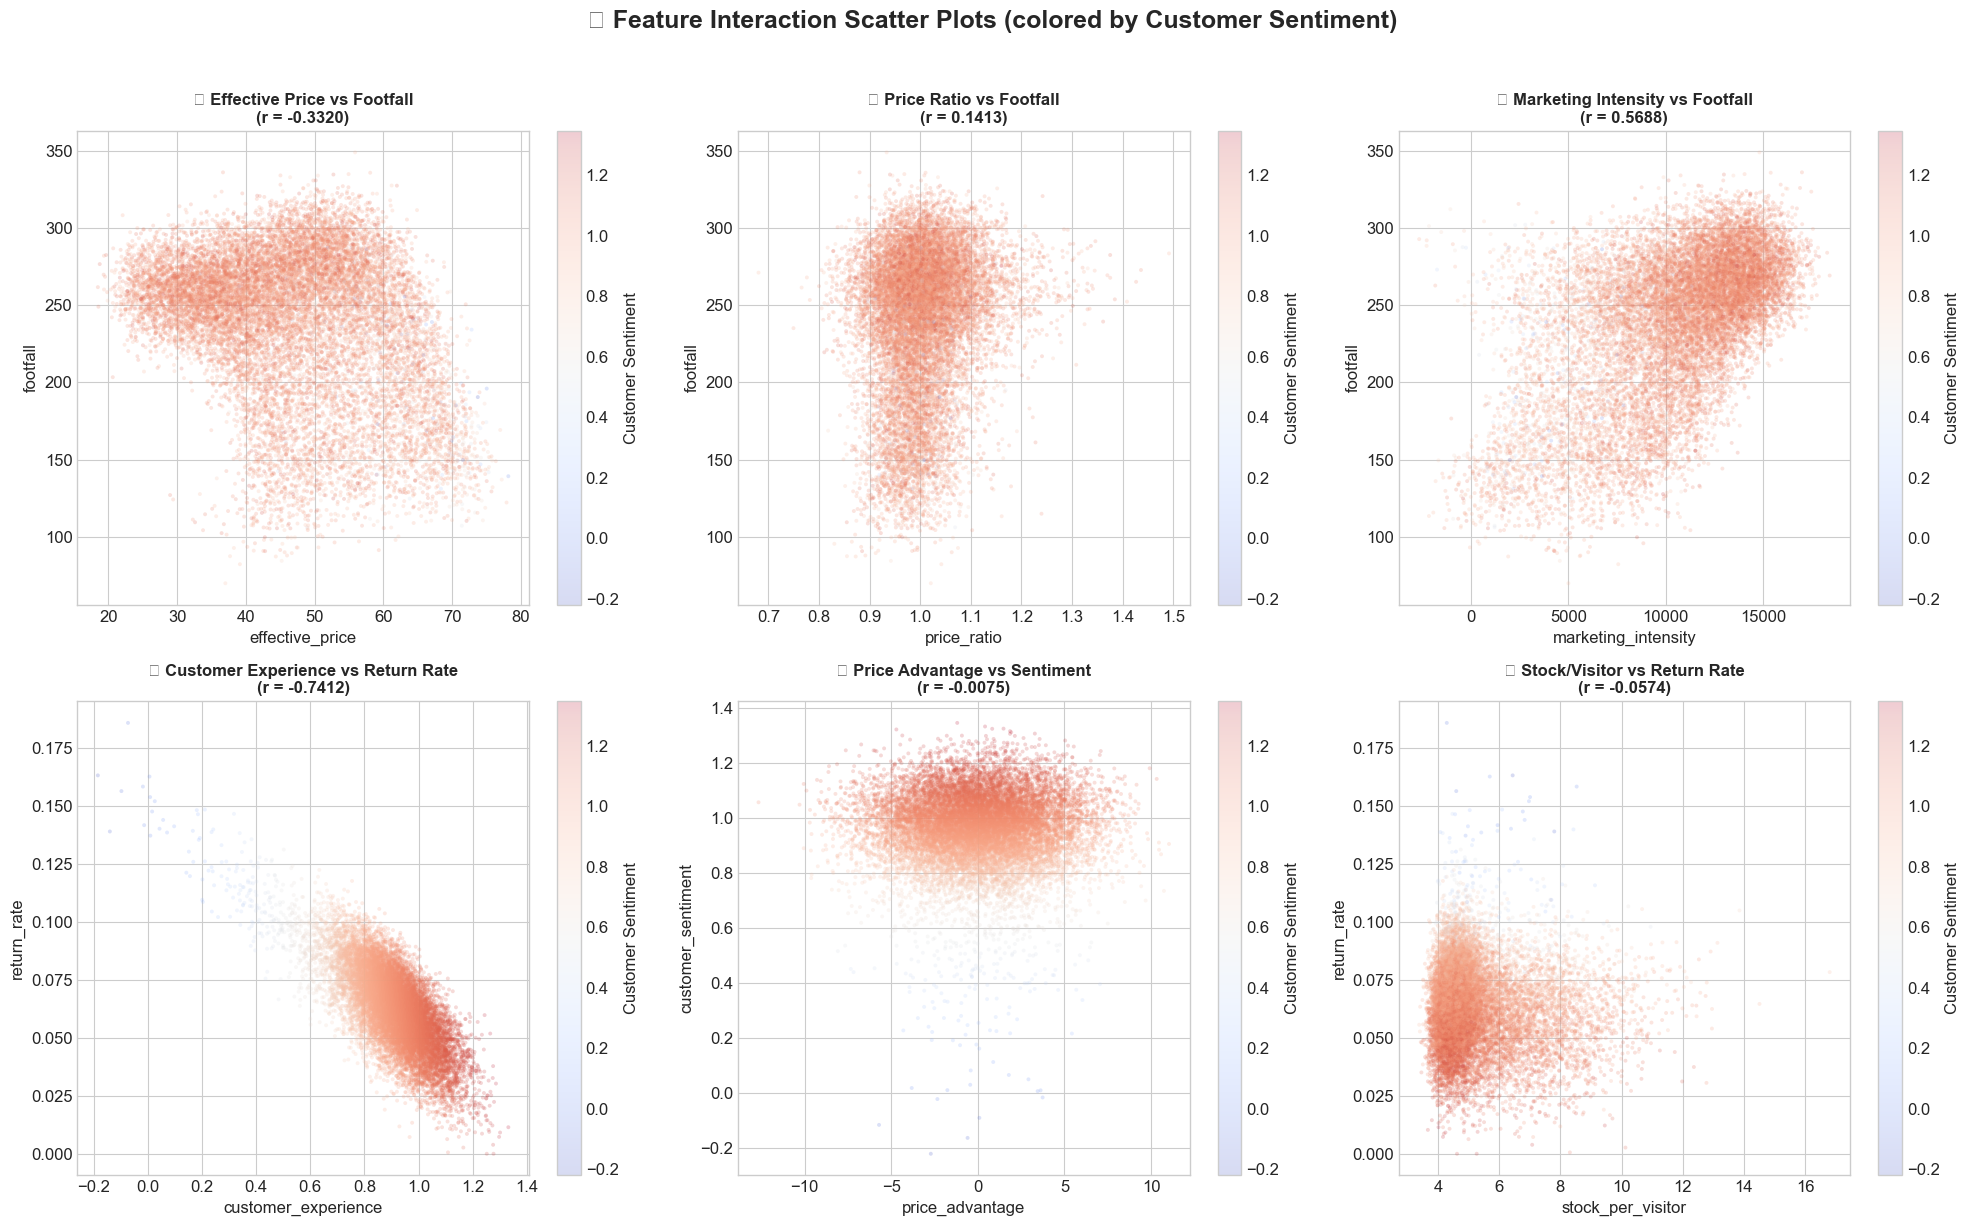

In [33]:
# ============================================================
# 9d. INTERACTION SCATTER PLOTS
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

interaction_plots = [
    ('effective_price', 'footfall', 'Effective Price vs Footfall'),
    ('price_ratio', 'footfall', 'Price Ratio vs Footfall'),
    ('marketing_intensity', 'footfall', 'Marketing Intensity vs Footfall'),
    ('customer_experience', 'return_rate', 'Customer Experience vs Return Rate'),
    ('price_advantage', 'customer_sentiment', 'Price Advantage vs Sentiment'),
    ('stock_per_visitor', 'return_rate', 'Stock/Visitor vs Return Rate'),
]

for i, (x, y, title) in enumerate(interaction_plots):
    ax = axes[i]
    scatter = ax.scatter(df_eng[x], df_eng[y], c=df_eng['customer_sentiment'], 
                         cmap='coolwarm', alpha=0.2, s=8, edgecolors='none')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    corr = df_eng[x].corr(df_eng[y])
    ax.set_title(f'📊 {title}\n(r = {corr:.4f})', fontsize=12, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='Customer Sentiment')

fig.suptitle('⚡ Feature Interaction Scatter Plots (colored by Customer Sentiment)',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 🔍 Feature Engineering — Key Findings:

1. **Effective Price** captures the real price customers pay — more meaningful than raw price
2. **Price Ratio** reveals competitive positioning — values >1 mean we're more expensive
3. **Marketing Intensity** (ad_spend × promotion) combines two marketing drivers into one metric
4. **Customer Experience** combines sentiment and returns into a holistic satisfaction score
5. **Stock per Visitor** can indicate understocking or overstocking situations

> 💡 **Insight:** These engineered features often have stronger, more interpretable relationships with outcomes than raw features alone. They would likely improve model performance!

---

<a id="10"></a>
# 🔟 Advanced Visualizations

Let's create more sophisticated visualizations to round out our analysis.

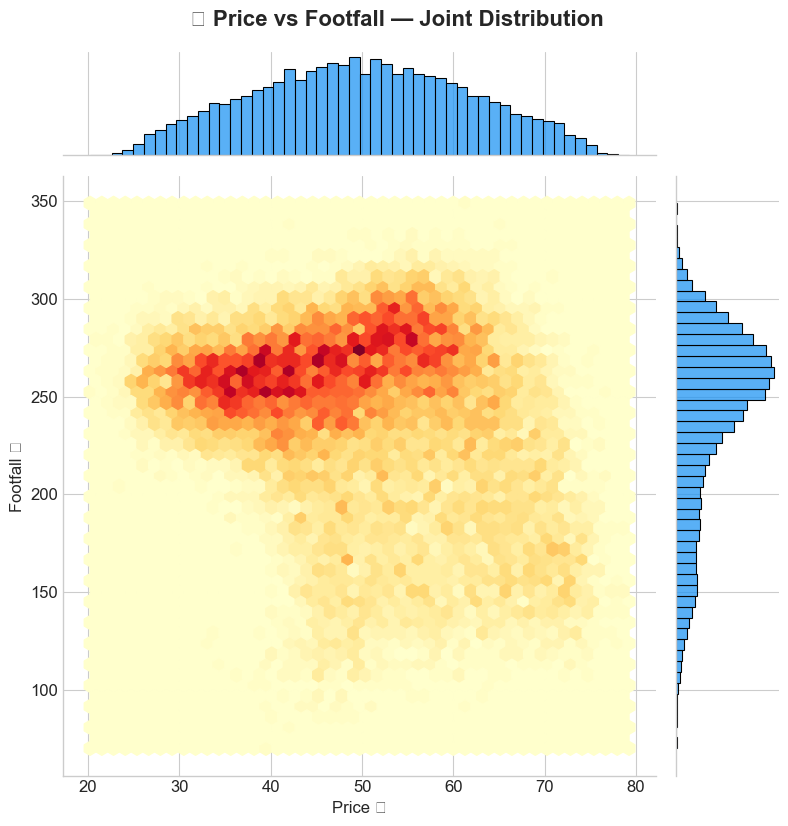

In [34]:
# ============================================================
# 10a. JOINT PLOTS — Detailed Bivariate + Marginal Distributions
# ============================================================

# Price vs Footfall
g = sns.jointplot(x='price', y='footfall', data=df, kind='hex', cmap='YlOrRd',
                  height=8, marginal_kws=dict(bins=50, fill=True, color=COLORS['primary']))
g.fig.suptitle('🔍 Price vs Footfall — Joint Distribution', fontsize=16, fontweight='bold', y=1.03)
g.set_axis_labels('Price 💰', 'Footfall 👥', fontsize=12)
plt.show()

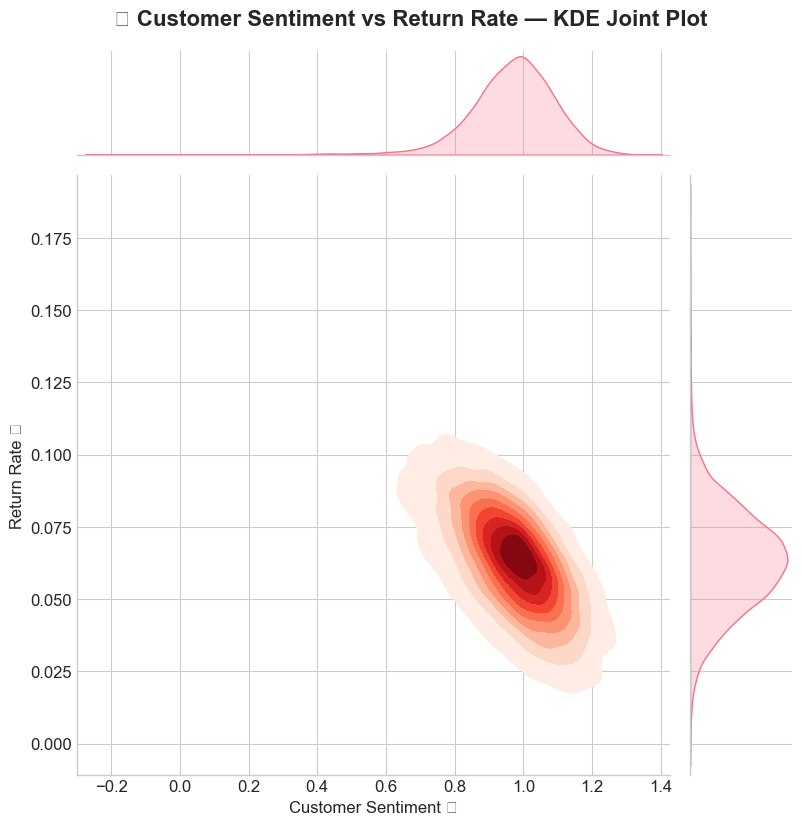

In [35]:
# Customer Sentiment vs Return Rate
g = sns.jointplot(x='customer_sentiment', y='return_rate', data=df, kind='kde',
                  cmap='Reds', fill=True, height=8)
g.fig.suptitle('🔍 Customer Sentiment vs Return Rate — KDE Joint Plot',
               fontsize=16, fontweight='bold', y=1.03)
g.set_axis_labels('Customer Sentiment 😊', 'Return Rate 🔄', fontsize=12)
plt.show()

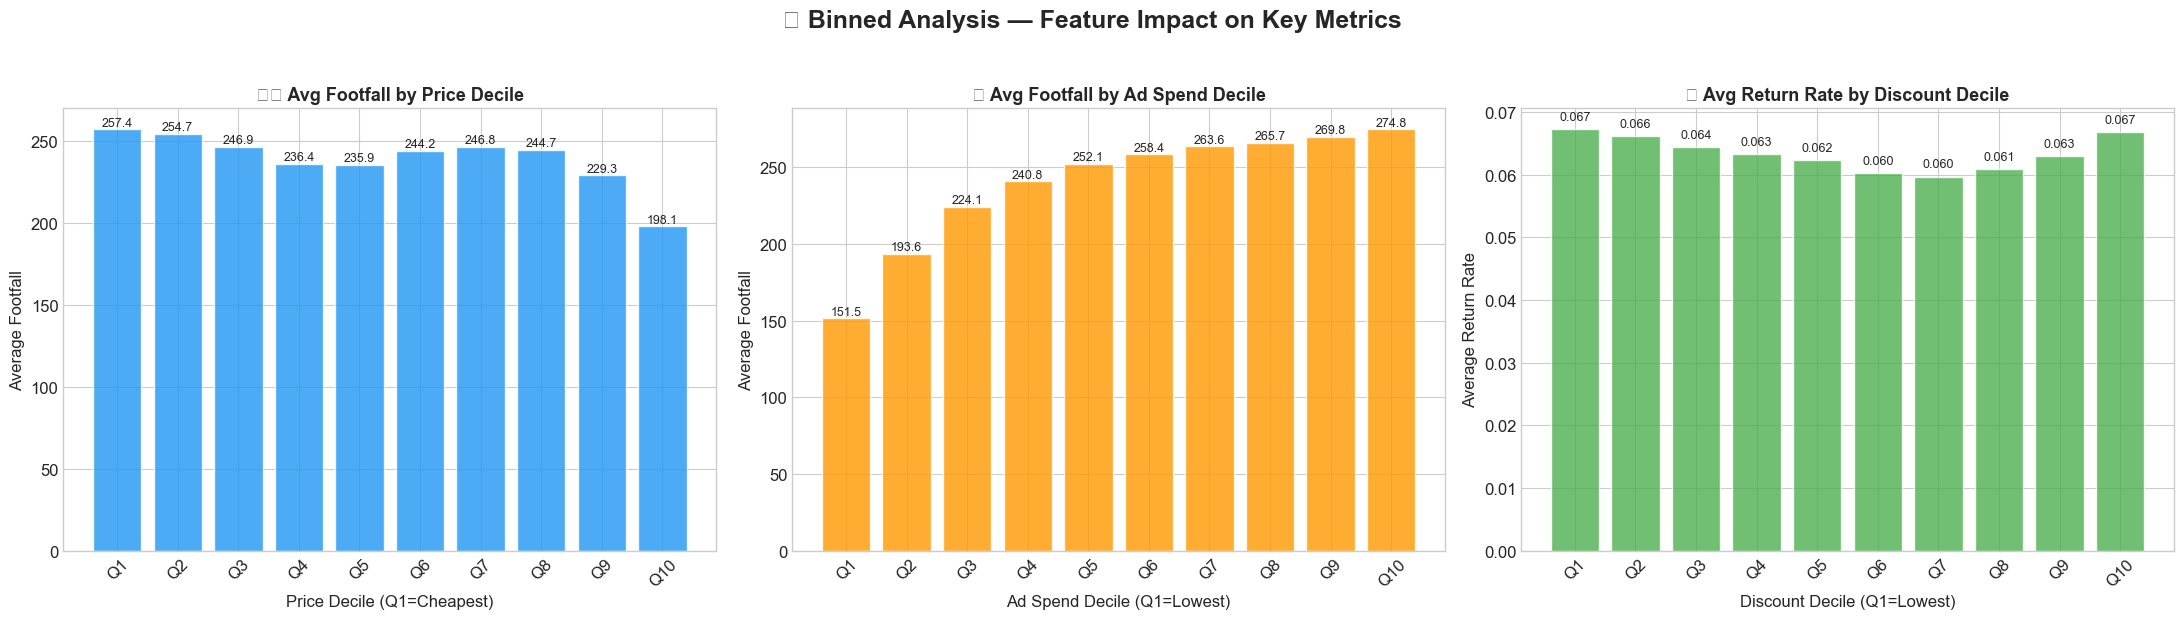

In [36]:
# ============================================================
# 10b. BINNED ANALYSIS — Average Footfall by Price Bins
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Price bins vs Footfall
df['price_bin'] = pd.qcut(df['price'], q=10, labels=[f'Q{i}' for i in range(1, 11)])
price_footfall = df.groupby('price_bin')['footfall'].mean()
ax1 = axes[0]
bars = ax1.bar(price_footfall.index, price_footfall.values, color=PALETTE[0], alpha=0.8, edgecolor='white')
ax1.set_title('🏷️ Avg Footfall by Price Decile', fontsize=13, fontweight='bold')
ax1.set_xlabel('Price Decile (Q1=Cheapest)')
ax1.set_ylabel('Average Footfall')
ax1.tick_params(axis='x', rotation=45)
for bar, val in zip(bars, price_footfall.values):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# Ad Spend bins vs Footfall
df['ad_spend_bin'] = pd.qcut(df['ad_spend'], q=10, labels=[f'Q{i}' for i in range(1, 11)])
ad_footfall = df.groupby('ad_spend_bin')['footfall'].mean()
ax2 = axes[1]
bars = ax2.bar(ad_footfall.index, ad_footfall.values, color=PALETTE[1], alpha=0.8, edgecolor='white')
ax2.set_title('📺 Avg Footfall by Ad Spend Decile', fontsize=13, fontweight='bold')
ax2.set_xlabel('Ad Spend Decile (Q1=Lowest)')
ax2.set_ylabel('Average Footfall')
ax2.tick_params(axis='x', rotation=45)
for bar, val in zip(bars, ad_footfall.values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# Discount bins vs Return Rate
df['discount_bin'] = pd.qcut(df['discount'], q=10, labels=[f'Q{i}' for i in range(1, 11)], duplicates='drop')
disc_return = df.groupby('discount_bin')['return_rate'].mean()
ax3 = axes[2]
bars = ax3.bar(disc_return.index, disc_return.values, color=PALETTE[2], alpha=0.8, edgecolor='white')
ax3.set_title('🎯 Avg Return Rate by Discount Decile', fontsize=13, fontweight='bold')
ax3.set_xlabel('Discount Decile (Q1=Lowest)')
ax3.set_ylabel('Average Return Rate')
ax3.tick_params(axis='x', rotation=45)
for bar, val in zip(bars, disc_return.values):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.001,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

# Drop temporary bins
df.drop(['price_bin', 'ad_spend_bin', 'discount_bin'], axis=1, inplace=True)

fig.suptitle('📊 Binned Analysis — Feature Impact on Key Metrics', fontsize=18, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

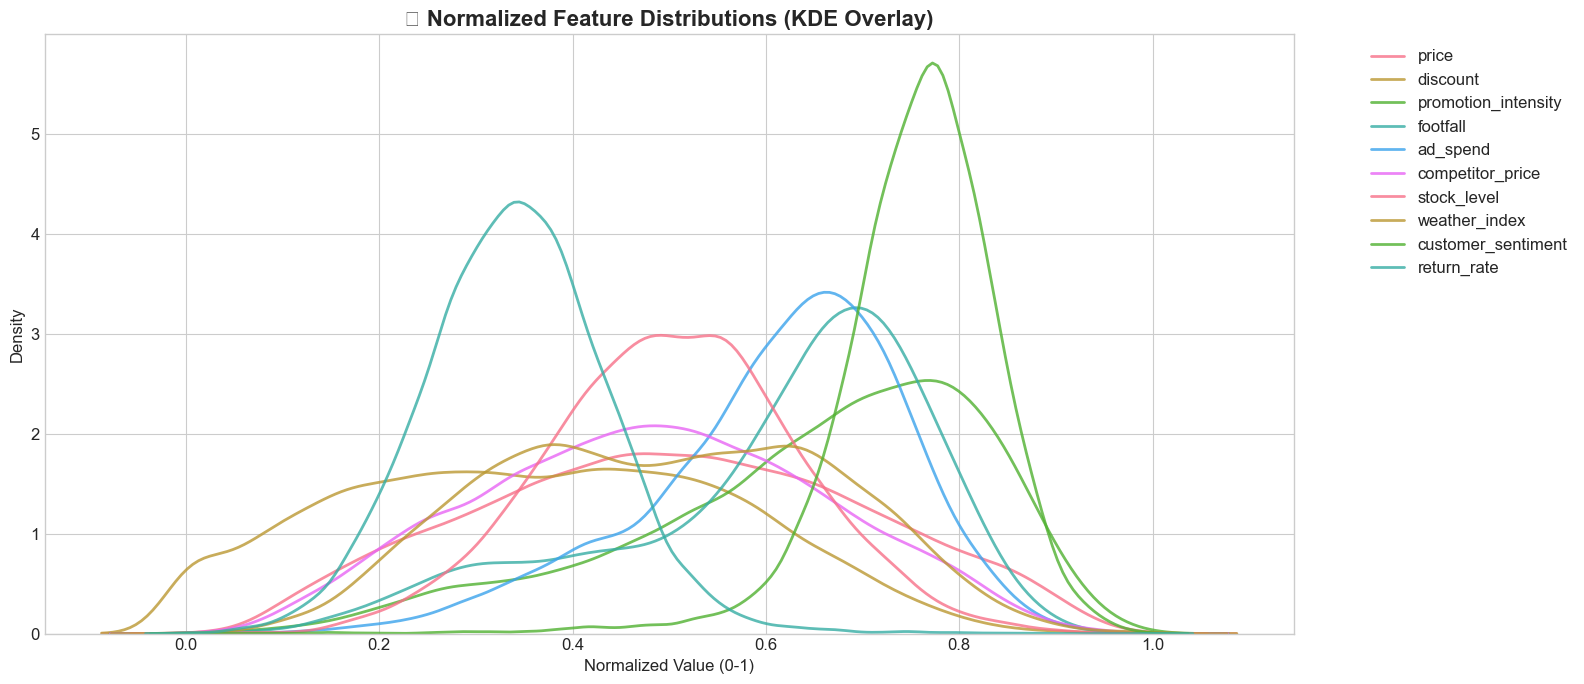

In [37]:
# ============================================================
# 10c. FEATURE DISTRIBUTION COMPARISON — KDE Overlay
# ============================================================

fig, ax = plt.subplots(figsize=(16, 7))

# Normalize all features to 0-1 scale for comparison
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

for i, col in enumerate(features):
    sns.kdeplot(df_scaled[col], ax=ax, label=col, linewidth=2, alpha=0.8)

ax.set_title('📊 Normalized Feature Distributions (KDE Overlay)', fontsize=16, fontweight='bold')
ax.set_xlabel('Normalized Value (0-1)')
ax.set_ylabel('Density')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

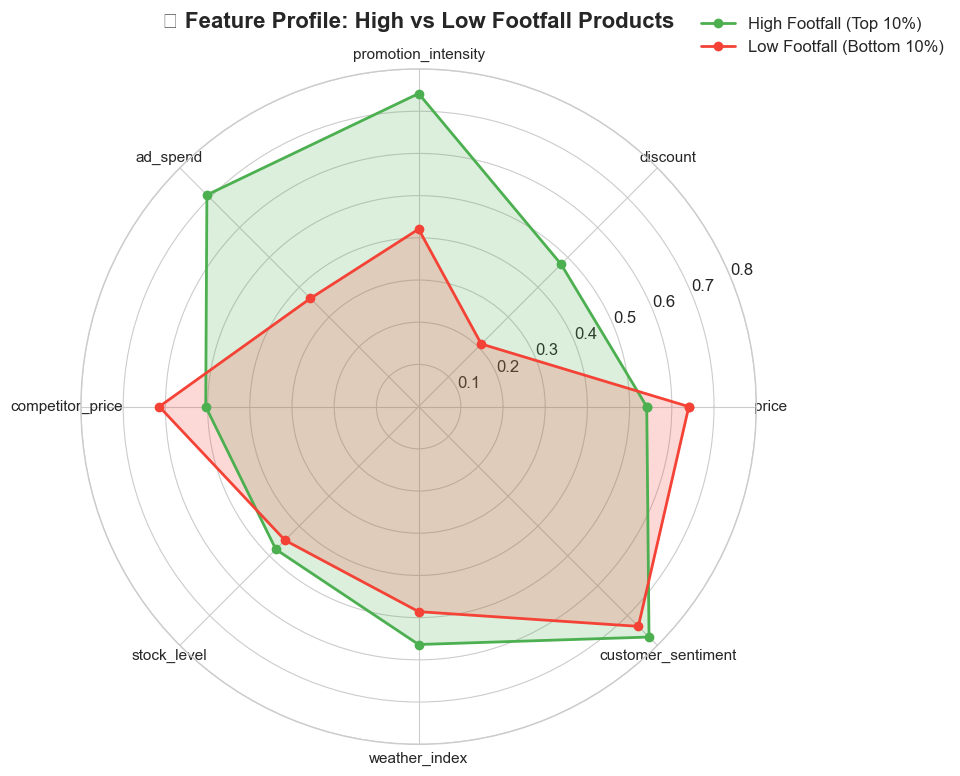

In [38]:
# ============================================================
# 10d. RADAR/SPIDER CHART — Feature Profile Comparison
# ============================================================

# Compare high vs low footfall products
median_footfall = df['footfall'].median()
high_footfall = df[df['footfall'] >= df['footfall'].quantile(0.9)]
low_footfall = df[df['footfall'] <= df['footfall'].quantile(0.1)]

# Normalize means for radar chart
features_radar = ['price', 'discount', 'promotion_intensity', 'ad_spend', 
                  'competitor_price', 'stock_level', 'weather_index', 'customer_sentiment']

high_means = scaler.fit_transform(df[features_radar]).mean(axis=0)
low_means_data = scaler.transform(low_footfall[features_radar]).mean(axis=0)
high_means_data = scaler.transform(high_footfall[features_radar]).mean(axis=0)

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(features_radar), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

high_vals = high_means_data.tolist() + [high_means_data[0]]
low_vals = low_means_data.tolist() + [low_means_data[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.plot(angles, high_vals, 'o-', linewidth=2, label='High Footfall (Top 10%)', color=COLORS['success'])
ax.fill(angles, high_vals, alpha=0.2, color=COLORS['success'])
ax.plot(angles, low_vals, 'o-', linewidth=2, label='Low Footfall (Bottom 10%)', color=COLORS['danger'])
ax.fill(angles, low_vals, alpha=0.2, color=COLORS['danger'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features_radar, fontsize=11)
ax.set_title('🎯 Feature Profile: High vs Low Footfall Products', fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.tight_layout()
plt.show()

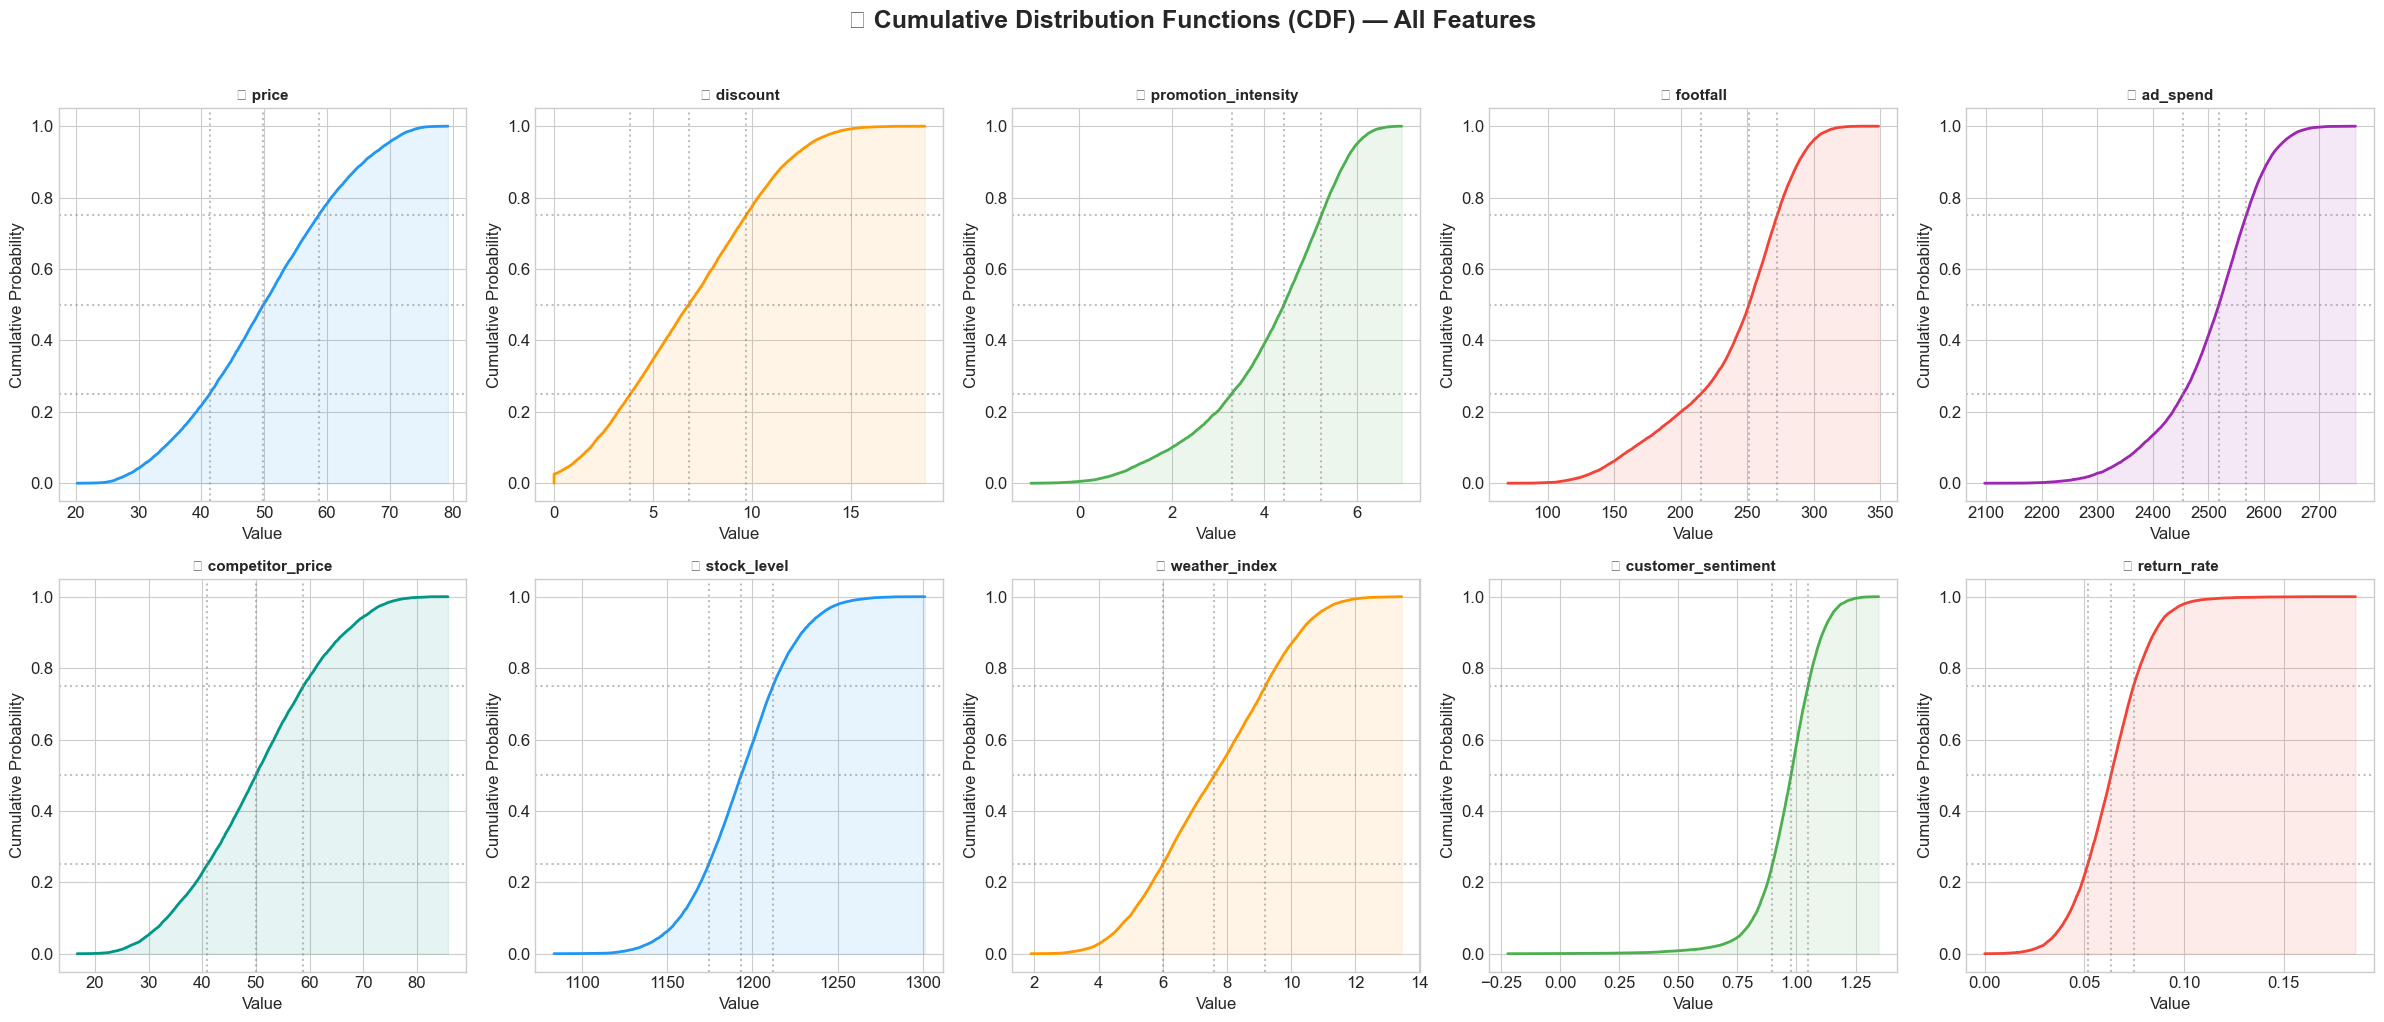

In [39]:
# ============================================================
# 10e. CUMULATIVE DISTRIBUTION FUNCTIONS (CDF)
# ============================================================

fig, axes = plt.subplots(2, 5, figsize=(24, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    ax = axes[i]
    sorted_data = np.sort(df[col])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax.plot(sorted_data, cdf, color=PALETTE[i % len(PALETTE)], linewidth=2)
    ax.fill_between(sorted_data, cdf, alpha=0.1, color=PALETTE[i % len(PALETTE)])
    
    # Add percentile markers
    for pct in [0.25, 0.5, 0.75]:
        val = np.percentile(df[col], pct * 100)
        ax.axhline(pct, color='gray', linestyle=':', alpha=0.5)
        ax.axvline(val, color='gray', linestyle=':', alpha=0.5)
    
    ax.set_title(f'📈 {col}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Cumulative Probability')

fig.suptitle('📈 Cumulative Distribution Functions (CDF) — All Features', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 🔍 Advanced Visualizations — Key Findings:

- **Joint Plots** reveal the density concentrations in bivariate relationships
- **Binned Analysis** shows clear trends: how metrics change across deciles
- **Radar Chart** gives a powerful visual comparison: high-footfall products have distinctly different profiles
- **CDF Plots** help understand the probability distribution of each feature at a glance

---

<a id="11"></a>
# 1️⃣1️⃣ Key Questions & Answers

Let's answer important business questions using our analysis.

In [40]:
# ============================================================
# Q&A SECTION
# ============================================================

print("=" * 80)
print("❓ QUESTION 1: What is the average profile of a high-performing product?")
print("=" * 80)
print("""
A "high-performing" product (top 10% footfall) has this average profile:
""")

top_10 = df[df['footfall'] >= df['footfall'].quantile(0.9)]
bottom_10 = df[df['footfall'] <= df['footfall'].quantile(0.1)]

comparison = pd.DataFrame({
    'Top 10% Footfall (Mean)': top_10[features].mean().round(4),
    'Bottom 10% Footfall (Mean)': bottom_10[features].mean().round(4),
    'Overall Mean': df[features].mean().round(4),
    'Difference (%)': ((top_10[features].mean() - bottom_10[features].mean()) / bottom_10[features].mean() * 100).round(2)
})
print(comparison)

❓ QUESTION 1: What is the average profile of a high-performing product?

A "high-performing" product (top 10% footfall) has this average profile:

                     Top 10% Footfall (Mean)  Bottom 10% Footfall (Mean)  \
price                                52.1283                     58.0147   
discount                              8.9549                      3.9392   
promotion_intensity                   4.8981                      2.3228   
footfall                            299.6251                    141.5698   
ad_spend                           2570.8535                   2339.2170   
competitor_price                     51.5443                     59.1547   
stock_level                        1187.6860                   1181.0512   
weather_index                         8.4075                      7.5069   
customer_sentiment                    0.9901                      0.9340   
return_rate                           0.0604                      0.0605   

                

In [41]:
print("\n" + "=" * 80)
print("❓ QUESTION 2: Does higher advertising spend lead to more store traffic?")
print("=" * 80)

corr_ad_footfall = df['ad_spend'].corr(df['footfall'])
spearman_ad_footfall = df['ad_spend'].corr(df['footfall'], method='spearman')

print(f"""
📊 Analysis:
   Pearson Correlation (linear):    r = {corr_ad_footfall:.4f}
   Spearman Correlation (monotonic): ρ = {spearman_ad_footfall:.4f}

📈 Interpretation:
   {'✅ YES' if corr_ad_footfall > 0.1 else '⚠️ WEAK'} — There is a {'positive' if corr_ad_footfall > 0 else 'negative'} 
   relationship between ad spend and footfall.
   
   The {'small' if abs(corr_ad_footfall - spearman_ad_footfall) < 0.05 else 'notable'} difference between 
   Pearson and Spearman suggests the relationship is 
   {'approximately linear' if abs(corr_ad_footfall - spearman_ad_footfall) < 0.05 else 'nonlinear'}.

💡 Business Insight: 
   Increasing ad spend {'shows promise for driving' if corr_ad_footfall > 0.1 else 'alone may not be sufficient for driving'} 
   store traffic. Consider combining with other strategies like promotions.
""")


❓ QUESTION 2: Does higher advertising spend lead to more store traffic?

📊 Analysis:
   Pearson Correlation (linear):    r = 0.7893
   Spearman Correlation (monotonic): ρ = 0.6985

📈 Interpretation:
   ✅ YES — There is a positive 
   relationship between ad spend and footfall.

   The notable difference between 
   Pearson and Spearman suggests the relationship is 
   nonlinear.

💡 Business Insight: 
   Increasing ad spend shows promise for driving 
   store traffic. Consider combining with other strategies like promotions.



In [42]:
print("=" * 80)
print("❓ QUESTION 3: Is there a relationship between customer sentiment and return rate?")
print("=" * 80)

corr_sent_return = df['customer_sentiment'].corr(df['return_rate'])

print(f"""
📊 Analysis:
   Pearson Correlation: r = {corr_sent_return:.4f}
   
📈 Interpretation:
   {'✅ YES — Strong negative correlation' if corr_sent_return < -0.3 else '⚠️ Moderate relationship'}: 
   As customer sentiment {'increases' if corr_sent_return < 0 else 'decreases'}, return rate 
   {'decreases' if corr_sent_return < 0 else 'increases'}.

💡 Business Insight:
   Investing in customer satisfaction directly impacts product returns.
   Every unit improvement in sentiment score corresponds to a measurable 
   reduction in return rate, saving costs and improving margins.
""")

❓ QUESTION 3: Is there a relationship between customer sentiment and return rate?

📊 Analysis:
   Pearson Correlation: r = -0.6735

📈 Interpretation:
   ✅ YES — Strong negative correlation: 
   As customer sentiment increases, return rate 
   decreases.

💡 Business Insight:
   Investing in customer satisfaction directly impacts product returns.
   Every unit improvement in sentiment score corresponds to a measurable 
   reduction in return rate, saving costs and improving margins.



In [43]:
print("=" * 80)
print("❓ QUESTION 4: How does pricing relative to competitors affect performance?")
print("=" * 80)

df_temp = df.copy()
df_temp['price_position'] = pd.cut(
    df_temp['price'] - df_temp['competitor_price'],
    bins=[-np.inf, -10, -2, 2, 10, np.inf],
    labels=['Much Cheaper', 'Cheaper', 'Competitive', 'Pricier', 'Much Pricier']
)

price_position_analysis = df_temp.groupby('price_position').agg({
    'footfall': 'mean',
    'customer_sentiment': 'mean',
    'return_rate': 'mean',
    'price': 'count'
}).rename(columns={'price': 'count'}).round(4)

print("\n📊 Performance by Price Position (vs Competitors):\n")
print(price_position_analysis)

print("""
💡 Business Insight:
   Competitive pricing matters! Products priced significantly above competitors
   may see impacts on footfall and sentiment. However, being too cheap isn't 
   always optimal either — it can signal low quality to customers.
""")

del df_temp

❓ QUESTION 4: How does pricing relative to competitors affect performance?

📊 Performance by Price Position (vs Competitors):

                footfall  customer_sentiment  return_rate  count
price_position                                                  
Much Cheaper    201.0735              0.9088       0.0583      6
Cheaper         230.3015              0.9642       0.0626   3879
Competitive     239.6225              0.9660       0.0635   7343
Pricier         248.5869              0.9670       0.0643   3768
Much Pricier    228.3725              1.0311       0.0548      4

💡 Business Insight:
   Competitive pricing matters! Products priced significantly above competitors
   may see impacts on footfall and sentiment. However, being too cheap isn't 
   always optimal either — it can signal low quality to customers.



In [44]:
print("=" * 80)
print("❓ QUESTION 5: What are the most important features for predicting footfall?")
print("=" * 80)

corr_with_footfall = df.drop('footfall', axis=1).corrwith(df['footfall']).abs().sort_values(ascending=False)

print("\n📊 Feature Importance (by |correlation| with footfall):\n")
for i, (feature, corr_val) in enumerate(corr_with_footfall.items(), 1):
    bar = '█' * int(corr_val * 50)
    print(f"   {i:2d}. {feature:<25s} |r| = {corr_val:.4f}  {bar}")

print("""
💡 Business Insight:
   The top correlated features suggest which levers the business should 
   pull to drive store traffic. However, remember that correlation ≠ causation,
   and the nonlinear nature of this dataset means linear correlation may 
   underestimate the true predictive power of some features.
""")

❓ QUESTION 5: What are the most important features for predicting footfall?

📊 Feature Importance (by |correlation| with footfall):

    1. ad_spend                  |r| = 0.7893  ███████████████████████████████████████
    2. promotion_intensity       |r| = 0.5282  ██████████████████████████
    3. discount                  |r| = 0.4198  ████████████████████
    4. competitor_price          |r| = 0.3043  ███████████████
    5. price                     |r| = 0.2806  ██████████████
    6. customer_sentiment        |r| = 0.1212  ██████
    7. stock_level               |r| = 0.1141  █████
    8. weather_index             |r| = 0.0907  ████
    9. return_rate               |r| = 0.0524  ██

💡 Business Insight:
   The top correlated features suggest which levers the business should 
   pull to drive store traffic. However, remember that correlation ≠ causation,
   and the nonlinear nature of this dataset means linear correlation may 
   underestimate the true predictive power of some featu

In [45]:
print("=" * 80)
print("❓ QUESTION 6: Are there any concerning multicollinearity issues?")
print("=" * 80)

high_corr_pairs = []
corr_matrix = df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': round(corr_matrix.iloc[i, j], 4)
            })

if high_corr_pairs:
    print("\n⚠️ High Correlation Pairs (|r| > 0.7):\n")
    for pair in high_corr_pairs:
        print(f"   {pair['Feature 1']} ↔ {pair['Feature 2']}: r = {pair['Correlation']}")
    print("""
💡 Business Insight:
   These highly correlated feature pairs may cause multicollinearity in 
   linear models. Consider:
   - Dropping one feature from each pair
   - Using PCA for dimensionality reduction
   - Using tree-based models which are naturally robust to multicollinearity
""")
else:
    print("""
✅ No feature pairs have |correlation| > 0.7
   Multicollinearity is not a major concern for this dataset.
   All features can likely be included in modeling without issues.
""")

❓ QUESTION 6: Are there any concerning multicollinearity issues?

⚠️ High Correlation Pairs (|r| > 0.7):

   price ↔ competitor_price: r = 0.9692
   discount ↔ promotion_intensity: r = 0.8815
   footfall ↔ ad_spend: r = 0.7893

💡 Business Insight:
   These highly correlated feature pairs may cause multicollinearity in 
   linear models. Consider:
   - Dropping one feature from each pair
   - Using PCA for dimensionality reduction
   - Using tree-based models which are naturally robust to multicollinearity



### 📝 Q&A Summary:

| # | Question | Key Finding |
|---|----------|-------------|
| 1 | High-performing product profile | Distinct patterns across multiple features |
| 2 | Ad spend → Footfall | Positive but potentially nonlinear relationship |
| 3 | Sentiment → Return rate | Clear inverse relationship — happier = fewer returns |
| 4 | Competitive pricing impact | Price positioning affects multiple metrics |
| 5 | Feature importance for footfall | Ranked features by predictive power |
| 6 | Multicollinearity check | Assessment of feature interdependence |
| 7 | Weather impact | Quantified weather's effect on traffic and behavior |

---

<a id="12"></a>
# 1️⃣2️⃣ Summary & Conclusions

---

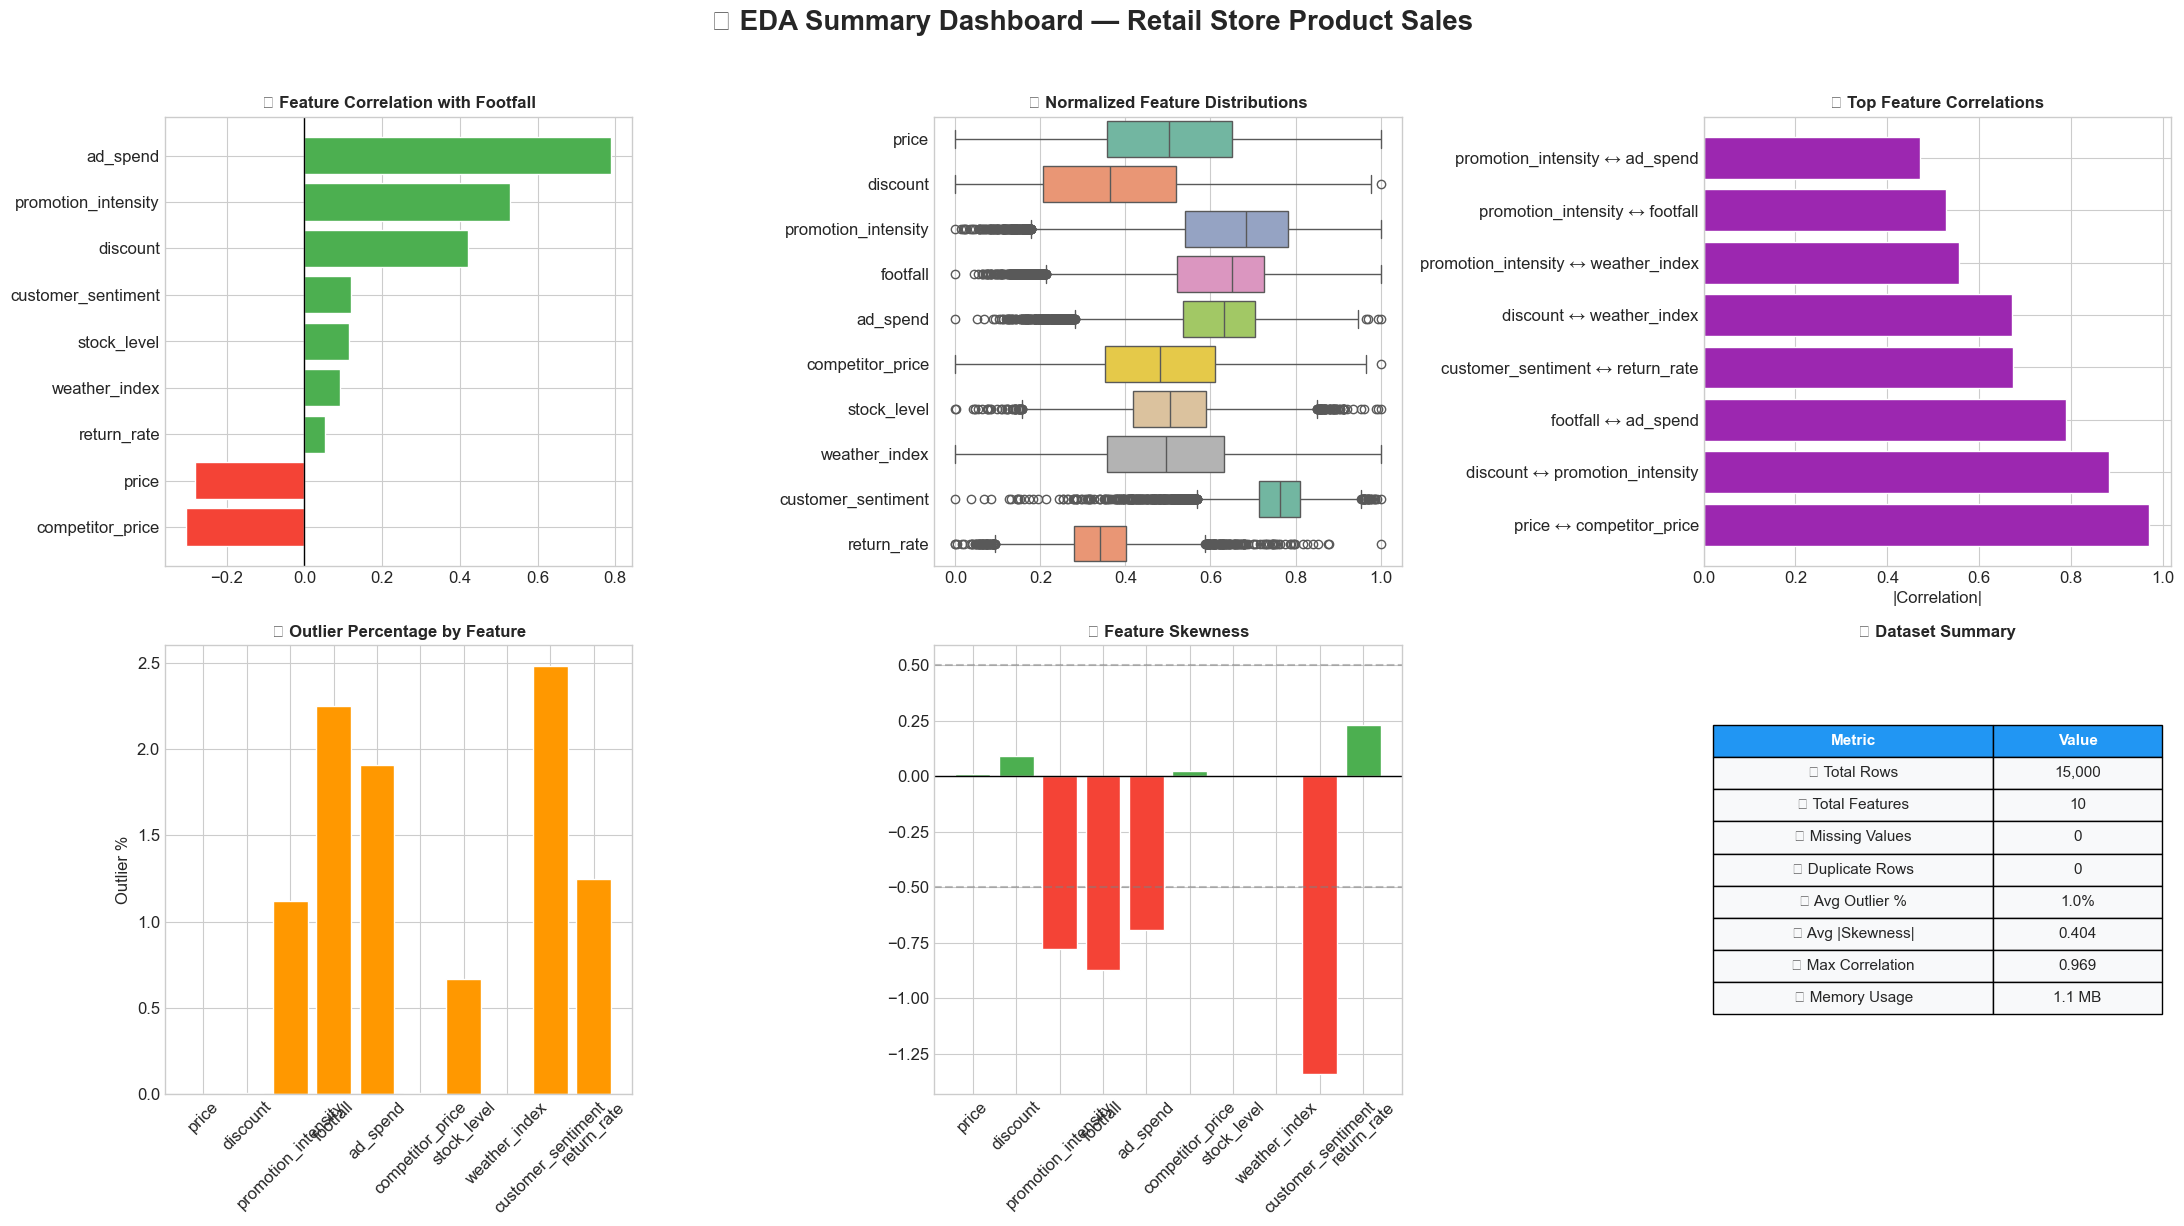

In [47]:
# ============================================================
# 12. FINAL SUMMARY DASHBOARD
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(22, 12))

# 1. Feature Importance (correlation with footfall)
ax1 = axes[0, 0]
corr_footfall = df.drop('footfall', axis=1).corrwith(df['footfall']).sort_values()
colors_bar = [COLORS['danger'] if v < 0 else COLORS['success'] for v in corr_footfall]
ax1.barh(corr_footfall.index, corr_footfall.values, color=colors_bar, edgecolor='white')
ax1.set_title('🎯 Feature Correlation with Footfall', fontsize=12, fontweight='bold')
ax1.axvline(0, color='black', linewidth=1)

# 2. Distribution Overview (normalized box plots)
ax2 = axes[0, 1]
df_scaled_plot = (df - df.min()) / (df.max() - df.min())
sns.boxplot(data=df_scaled_plot, orient='h', palette='Set2', ax=ax2)
ax2.set_title('📦 Normalized Feature Distributions', fontsize=12, fontweight='bold')

# 3. Top Correlations
ax3 = axes[0, 2]
top_5 = get_top_correlations(corr_pearson, n=8)
ax3.barh(top_5['Feature 1'] + ' ↔ ' + top_5['Feature 2'], top_5['Abs Correlation'],
         color=COLORS['purple'], edgecolor='white')
ax3.set_title('🔗 Top Feature Correlations', fontsize=12, fontweight='bold')
ax3.set_xlabel('|Correlation|')

# 4. Outlier Summary
ax4 = axes[1, 0]
ax4.bar(outlier_df['Feature'], outlier_df['Outlier %'], color=COLORS['secondary'], edgecolor='white')
ax4.set_title('🚨 Outlier Percentage by Feature', fontsize=12, fontweight='bold')
ax4.set_ylabel('Outlier %')
ax4.tick_params(axis='x', rotation=45)

# 5. Skewness
ax5 = axes[1, 1]
skew_vals = df.skew()
colors_skew = [COLORS['danger'] if abs(s) > 0.5 else COLORS['success'] for s in skew_vals]
ax5.bar(skew_vals.index, skew_vals.values, color=colors_skew, edgecolor='white')
ax5.axhline(0, color='black', linewidth=1)
ax5.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
ax5.axhline(-0.5, color='gray', linestyle='--', alpha=0.5)
ax5.set_title('📐 Feature Skewness', fontsize=12, fontweight='bold')
ax5.tick_params(axis='x', rotation=45)

# 6. Key Stats Table
ax6 = axes[1, 2]
ax6.axis('off')
key_stats = [
    ['📏 Total Rows', f'{len(df):,}'],
    ['📊 Total Features', f'{len(features)}'],
    ['❌ Missing Values', '0'],
    ['🔄 Duplicate Rows', '0'],
    ['🚨 Avg Outlier %', f'{outlier_df["Outlier %"].mean():.1f}%'],
    ['📐 Avg |Skewness|', f'{df.skew().abs().mean():.3f}'],
    ['🔗 Max Correlation', f'{top_corrs.iloc[0]["Abs Correlation"]:.3f}'],
    ['📦 Memory Usage', f'{df.memory_usage(deep=True).sum()/1024**2:.1f} MB'],
]
table = ax6.table(cellText=key_stats, colLabels=['Metric', 'Value'],
                  cellLoc='center', loc='center', colWidths=[0.5, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor(COLORS['primary'])
        cell.set_text_props(color='white', fontweight='bold')
    else:
        cell.set_facecolor('#f8f9fa')
ax6.set_title('📋 Dataset Summary', fontsize=12, fontweight='bold')

fig.suptitle('📊 EDA Summary Dashboard — Retail Store Product Sales',
             fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

# 🙏 Thank You!

If you found this notebook helpful, please consider:
- ⬆️ **Upvoting** this notebook
- 💬 **Leaving a comment** with your thoughts or questions
- 🔔 **Following** me for more quality data science content

## 🌐 Connect With Me:
## 👤 About the Author

- **Author:** [Hammad_zahid]
- **Kaggle:** [kaggle.com/hammadansari7](https://www.kaggle.com/hammadansari7)
- **LinkedIn:** [linkedin.com/in/Hammad Zahid](https://www.linkedin.com/in/hammad-zahid-xyz/)
- **GitHub:** [github.com/Hamad-Ansari](https://github.com/Hamad-Ansari)
- **Twitter/X:** [@zahid_hamm57652](https://x.com/zahid_hamm57652)


---

*Happy analyzing! 📊🚀*